<h1>Содержание<span class="tocSkip">
    </span>
</h1>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1">
                    <span class="toc-item-num">1&nbsp;&nbsp;
                    </span>Изучение данных из файла
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Вывод" data-toc-modified-id="Вывод-1.1">
                            <span class="toc-item-num">1.1&nbsp;&nbsp;
                            </span>Вывод
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2">
                    <span class="toc-item-num">2&nbsp;&nbsp;
                    </span>Предобработка данных
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3">
                    <span class="toc-item-num">3&nbsp;&nbsp;
                    </span>Исследовательский анализ данных
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4">
                    <span class="toc-item-num">4&nbsp;&nbsp;
                    </span>Портрет пользователя каждого региона
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5">
                    <span class="toc-item-num">5&nbsp;&nbsp;
                    </span>Проверьте гипотез
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6">
                    <span class="toc-item-num">6&nbsp;&nbsp;
                    </span>Общий вывод
                </a>
            </span>
        </li>
    </ul>
</div>

# Краткий вывод


Лучшие жанры: Экшен, Шутер, Ролевые, Спорт, Симуляторы

Лучшие платформы: PS4,XOne,PC,Wiiu

Лучшие рейтинги M,E,T,E10+ 


## Изучение данных из файла

Откроем файл и изучим его

In [1]:
#импорт необходимых библиотек
import os
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#прочтем файл с вариантом разных путей

pth1 = '/datasets/games.csv'
pth2 = 'D:/Y_P/prefabricated_project/games.csv'

if os.path.exists(pth1):
    dff = pd.read_csv(pth1)
elif os.path.exists(pth2):
    dff = pd.read_csv(pth2)
else:
    print('Something is wrong')

dff - data frame filthy

In [3]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#кол-во явных дубликатов
dff.duplicated().sum()

0

In [5]:
# подсчёт пропусков в процентном выражении
dff.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [6]:
dff.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Вывод

В данных 10 столбцов и 16715 строк, есть пропуски, нет дупликатов.   

Нужно:
* переименовать столбцы
* заполнить пропуски там где это разумно
* добаваить колонки принеобходимости 

## Предобработка данных

Переименуем столбцы, заполним пропуски там где это уместно, детально изучим данные, разберемся с аномалиями елси они есть 

In [7]:
#переименование столбцов
dff.columns = dff.columns.str.lower()

In [8]:
dff['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [9]:
dff['year_of_release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [10]:
dff['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [11]:
dff['na_sales'].describe()

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

In [12]:
dff['eu_sales'].describe()

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

In [13]:
dff['jp_sales'].describe()

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

In [14]:
dff['other_sales'].describe()

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

In [15]:
dff['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [16]:
dff['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

In [17]:
dff['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [18]:
dff['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Изменим некоторые даныые
* tbd  в столбе оценка пользователей возможно 'to be determined', что означет 'подлежит определению', чтобы не мешать вычислениям удалим значения
* K-A рейтинг в 1997 году переименовали в Е, пропуски на RP


In [19]:
dff.loc[dff['user_score'] == 'tbd', 'user_score'] =  np.nan

In [20]:
dff.loc[dff['rating'] == 'K-A', 'rating'] = 'E'
dff['rating'] = dff['rating'].fillna('no_ESRB')

In [21]:
#меняем тип
dff['user_score'] = dff['user_score'].astype(float)

In [22]:
# добавляем столбец с числом общих продаж
dff['all_sales'] = (dff['na_sales']+
                   dff['eu_sales']+
                   dff['jp_sales']+
                   dff['other_sales'])

Заполнять пропуски пока не будем, возможно в дальнейшем это сыграет с нами злую шутку и исказит данные

## Исследовательский анализ данных

### Игры в год

Посмотроим количество игр в год 


In [23]:
dff['year_of_release'].value_counts().sort_index()

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64

Text(0.5, 1.0, 'Релизов игр в год')

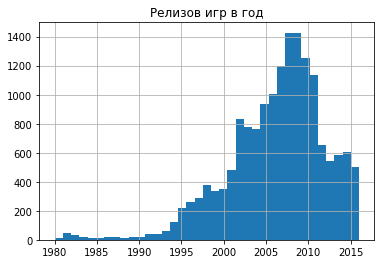

In [24]:
h = dff[dff['year_of_release']!=0]['year_of_release'].hist(bins=37)
plt.title('Релизов игр в год')

Так как есть любители old school, данные могут быть важны даже за 1980 год, а заполнять значение "0" не вяглядит разумным

### Платформы  и их распределение по годам

In [25]:
dff['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Text(0.5, 1.0, 'Кол-во игр на платформе')

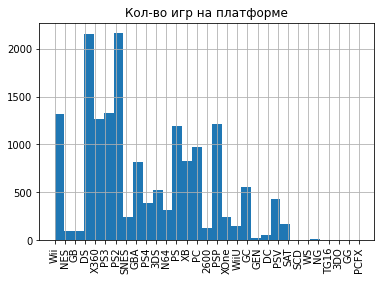

In [26]:
h = dff['platform'].hist(bins=31)
plt.xticks(rotation=90)
plt.title('Кол-во игр на платформе')

In [27]:
#bsp_all сокращение от big_sales_platform_all
bsp_all = dff.groupby(by="platform",as_index=False)['all_sales'].sum()
bsp_all = bsp_all.sort_values('all_sales',
                              ascending=False,
                              ignore_index=True)
bsp_all = bsp_all[bsp_all['all_sales']>150]
bsp_all

,platform,all_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [28]:
dff.loc[dff['platform'] == 'DS'].loc[dff['year_of_release'] < 1998]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,no_ESRB,0.02


In [29]:
dff.loc[15957, 'year_of_release'] = np.nan

In [30]:
#датафрейм только с консолями из списка bsp_all
top_platform = dff[dff['platform'].isin(bsp_all['platform'])]
top_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_ESRB,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_ESRB,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_ESRB,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,no_ESRB,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_ESRB,0.01


In [31]:
#создание датафрейма дата(год релиза, платформа,)
data = top_platform[top_platform['platform']!=0].groupby(['year_of_release', 'platform'])['name'].count().reset_index()
sales = top_platform[top_platform['platform']!=0].groupby(['platform'])['name'].count().reset_index()
data = data.merge(sales, on='platform')
#name_x всего игр у консоли
#name_y игр у консоли за год
data['name_x'] /= data['name_y'] * 100

In [32]:
data

,year_of_release,platform,name_x,name_y
0,1983.0,NES,0.000612,98
1,1984.0,NES,0.001327,98
2,1985.0,NES,0.001122,98
3,1986.0,NES,0.001939,98
4,1987.0,NES,0.001020,98
...,...,...,...,...
179,2016.0,PS4,0.004184,392
180,2013.0,XOne,0.000769,247
181,2014.0,XOne,0.002470,247
182,2015.0,XOne,0.003239,247


In [33]:
#функция вызова графика
def platform(name):   
    plt.figure(figsize=(16,4))
    sns.lineplot(data=data[data['platform']==name], x='year_of_release', y='name_x', hue='platform');

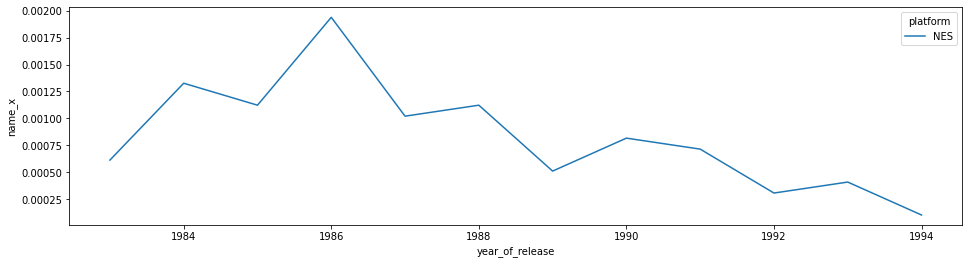

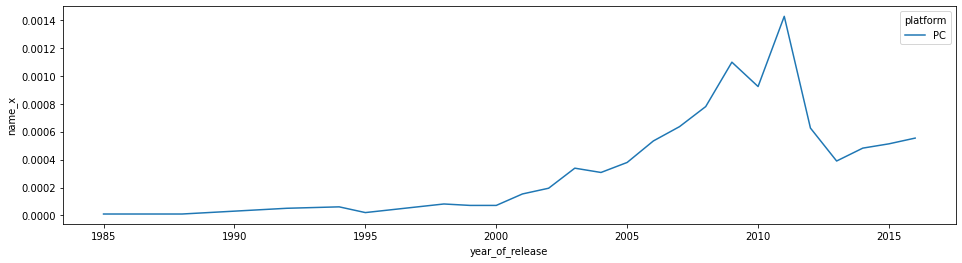

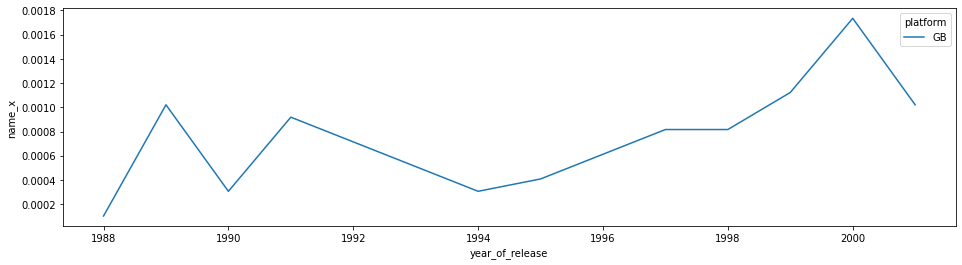

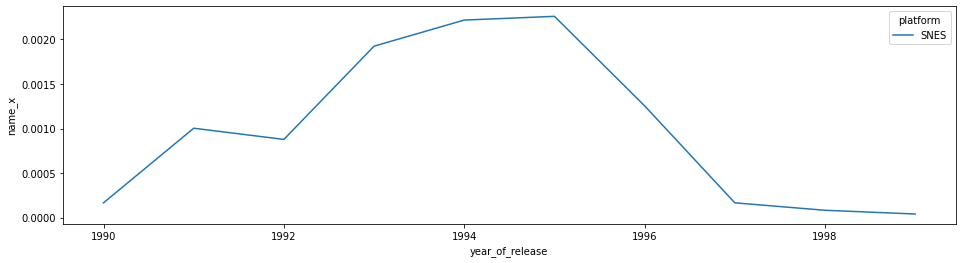

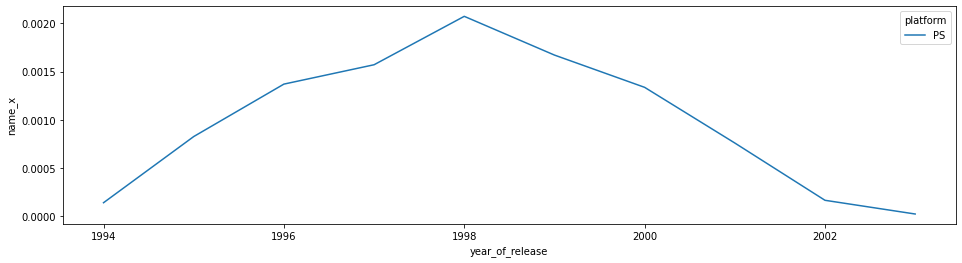

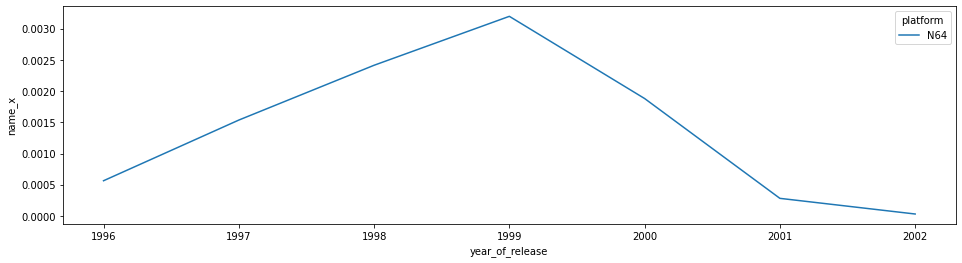

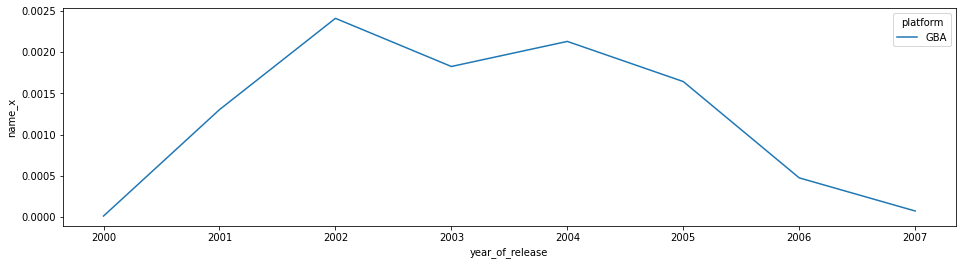

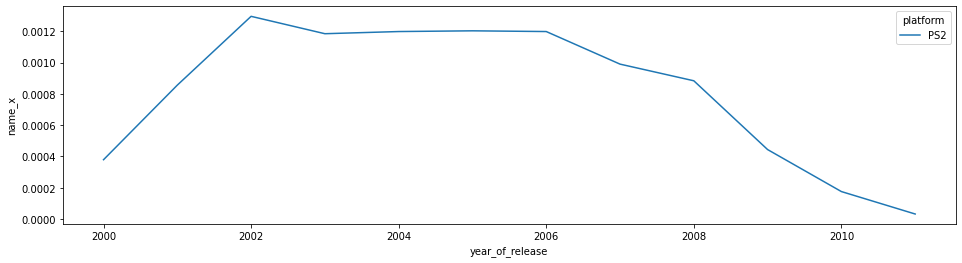

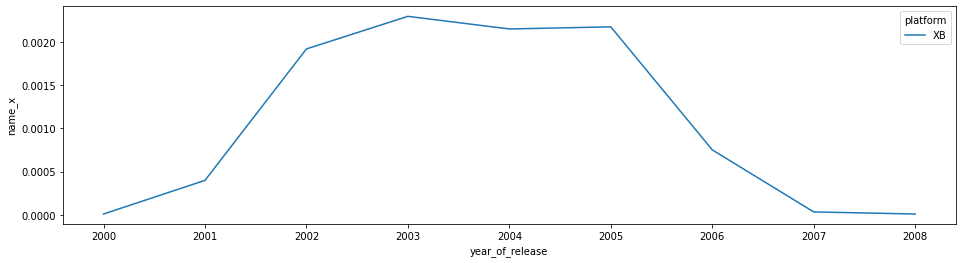

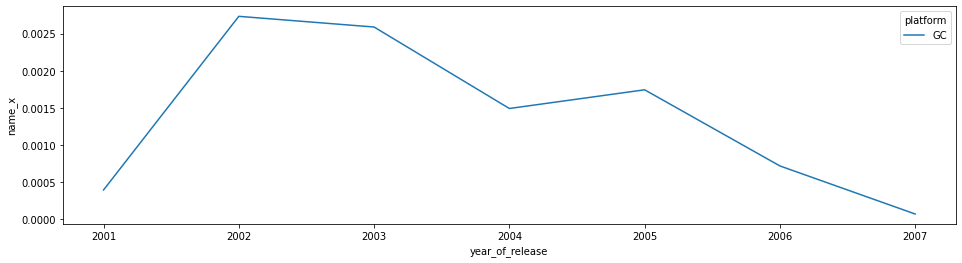

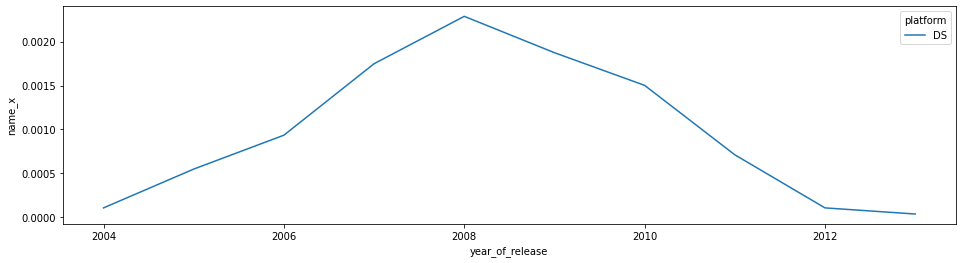

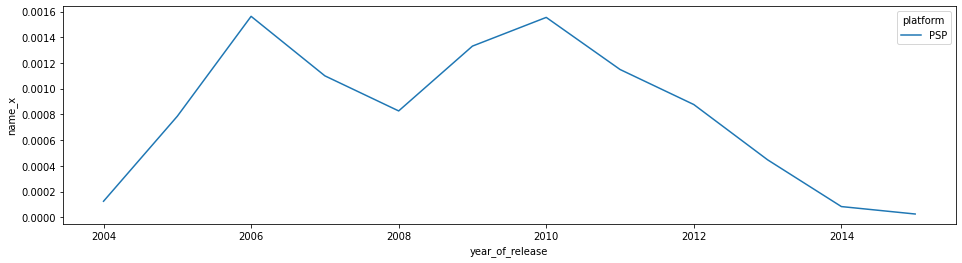

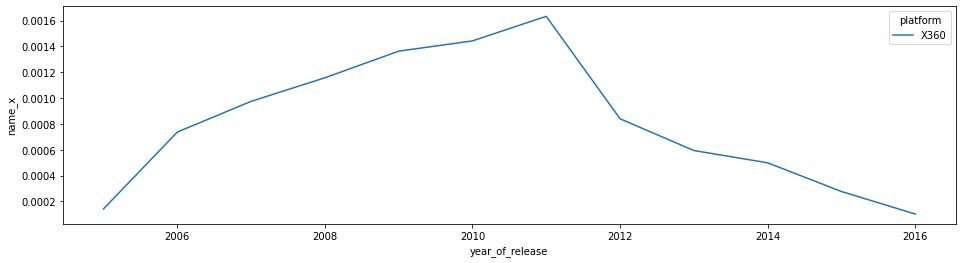

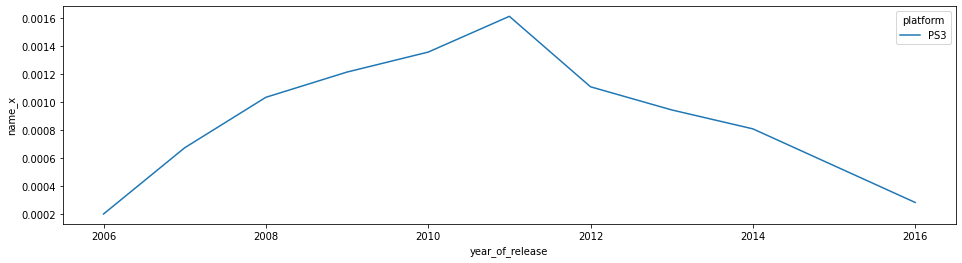

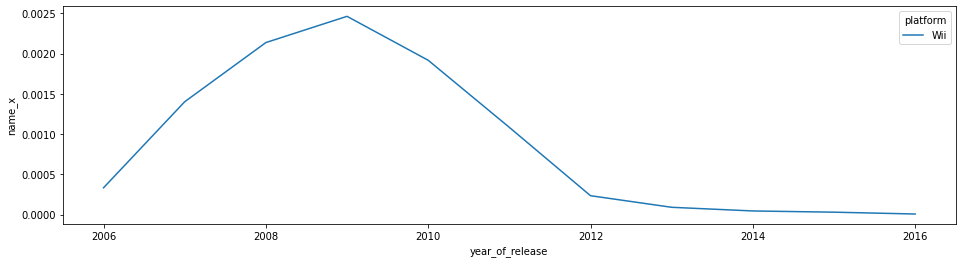

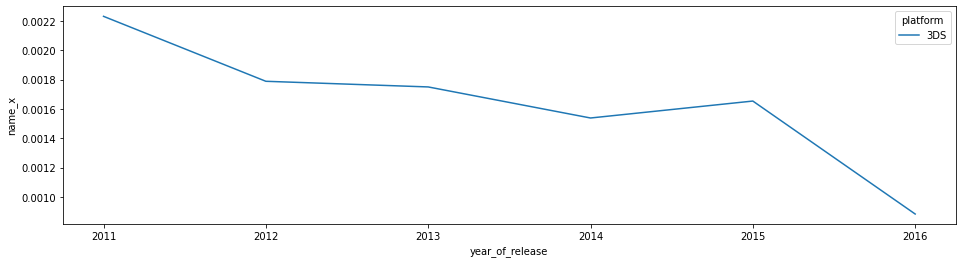

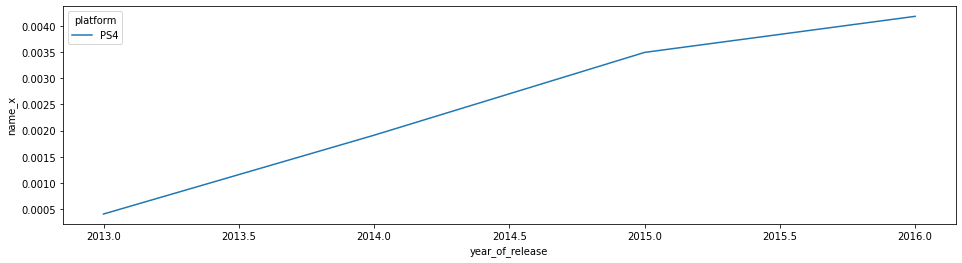

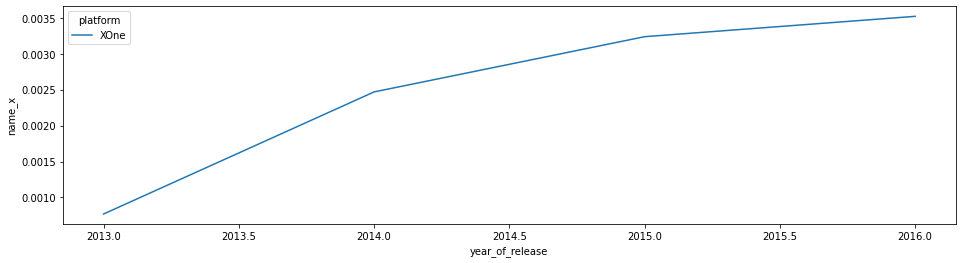

In [34]:
for elem in data['platform'].unique():
    platform(elem) 

Судя по графикам делав идут в гору только у PS4 и XOne, а так же PC после резкого пике начинает набирать обороты

Платформа устаревает в среднем за 6-10 лет, так как появляются новые технологи и как следствие новые платформы, с большей производительностью и качеством, примерно с такой же периодичностью появляются новые платформы

### Актуальные данные

Актуальные данные, это данные которые помогут нам в дальнейшем исследовании, так как большинство платформ уже вышло из моды, и на ниъ наврятли появятся новые игры, посмотрим платвормы на которые после 2014 еще выходят игры (2017-3=2014) и на те у которых были релизы до 2011(так как 2017-6=2011)

In [35]:
#платформы у котороых был выход после 2014года
platforms_after_2014 = []
for i in range(len(dff)):
    if dff['year_of_release'][i]>=2014:
        if dff['platform'][i] not in platforms_after_2014:
            platforms_after_2014.append(dff['platform'][i])

#плафтформы у которых был выход до 2007(из числа platforms_after_2014)            
platforms_before_2011 = []
for i in range(len(dff)):
    for elem in platforms_after_2014:
        if dff['year_of_release'][i] <= 2011:
            if (dff['platform'][i] in platforms_after_2014 and
                dff['platform'][i] not in platforms_before_2011 and 
                #"PC" оставляем потому что данныя платформа актуальна по сей день 
                dff['platform'][i] != 'PC'):
                
                platforms_before_2011.append(dff['platform'][i])
#Платформы у которых был выход после 2014 и не было до 2012              
actual_platforms=[]
for i in range(len(platforms_after_2014)):
    for j in range(len(platforms_before_2011)):
        if (platforms_after_2014[i] not in actual_platforms and 
           platforms_after_2014[i] not in platforms_before_2011):
            actual_platforms.append(platforms_after_2014[i])
            
actual_platforms

#нужна помощь с оптимизацией        

['PS4', 'XOne', 'WiiU', 'PC']

Cоздадим новый датафрейм в который возьмем игры релизом после 2013г

In [36]:
#саздаю датафрейм  котором в все релизы были после 2011
dff.loc[dff['year_of_release'] <2014, 'year_of_release'] =  0
df = dff.loc[dff['year_of_release'] != 0] 
df = df.reset_index()
df = df.drop(columns=['index'])

In [37]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_ESRB,14.63
1,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_ESRB,11.68
3,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_ESRB,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1954,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
1955,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
1956,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
1957,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01


In [38]:
# Комментарий ревьюера 2
df.year_of_release.min()

2014.0

### Лидирующие платформы по продажам

In [39]:
df['platform'].value_counts().head()

PS4     376
PSV     296
PS3     244
XOne    228
3DS     220
Name: platform, dtype: int64

In [40]:
#bsp_all сокращение от big_sales_platform_all
bsp_all = df.groupby(by="platform",as_index=False)['all_sales'].sum()
bsp_all = bsp_all.sort_values('all_sales',
                              ascending=False,
                              ignore_index=True)
bsp_all

,platform,all_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,87.87
3,PS3,76.49
4,X360,58.40
5,WiiU,42.98
6,PC,30.81
7,PSV,22.66
8,PS2,22.21
9,Wii,21.40


In [41]:
#таблица платформ, сумме продаж  и средних оценок
sales = df.pivot_table(index='platform',values=['na_sales','eu_sales','jp_sales','other_sales','all_sales'],aggfunc='sum')
score = df.pivot_table(index='platform',values=['critic_score','user_score'],aggfunc='mean')
sales = sales.merge(score, on='platform')

sales = sales.reset_index()
sales.sort_values(by='all_sales', ascending=False)

,platform,all_sales,eu_sales,jp_sales,na_sales,other_sales,critic_score,user_score
8,PS4,288.15,130.04,15.02,98.61,44.48,72.164557,6.828099
15,XOne,140.36,46.25,0.32,81.27,12.52,73.793548,6.594545
0,3DS,87.87,16.33,44.29,23.48,3.77,68.735849,7.062069
7,PS3,76.49,28.62,12.00,25.41,10.46,66.403846,6.167544
13,X360,58.40,17.93,0.21,35.03,5.23,64.687500,5.980769
12,WiiU,42.98,13.15,7.31,19.36,3.16,71.186047,7.087500
4,PC,30.81,20.04,0.00,8.42,2.35,76.189394,6.362774
10,PSV,22.66,3.58,14.61,2.63,1.84,72.363636,7.655405
6,PS2,22.21,6.66,1.66,10.92,2.97,69.434783,7.714286
11,Wii,21.40,6.48,1.05,12.11,1.76,64.352941,6.871429


In [42]:
sales

,platform,all_sales,eu_sales,jp_sales,na_sales,other_sales,critic_score,user_score
0,3DS,87.87,16.33,44.29,23.48,3.77,68.735849,7.062069
1,DS,3.36,0.48,0.57,2.09,0.22,66.333333,7.350000
2,GBA,4.97,0.66,0.77,3.42,0.12,70.625000,8.150000
3,GC,2.20,0.39,0.24,1.52,0.05,65.000000,6.877778
4,PC,30.81,20.04,0.00,8.42,2.35,76.189394,6.362774
5,PS,3.28,1.22,0.04,1.80,0.22,68.000000,8.233333
6,PS2,22.21,6.66,1.66,10.92,2.97,69.434783,7.714286
7,PS3,76.49,28.62,12.00,25.41,10.46,66.403846,6.167544
8,PS4,288.15,130.04,15.02,98.61,44.48,72.164557,6.828099
9,PSP,4.88,1.06,1.26,1.90,0.66,59.000000,6.033333


Text(0.5, 1.0, 'Кол-во миллионов продаж каждой платформы с 2014 года')

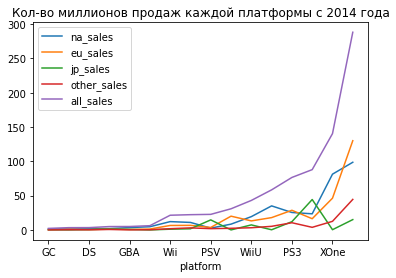

In [43]:
#график продаж
sales.sort_values(by='all_sales', ascending=True).plot(
                                                        y=['na_sales','eu_sales','jp_sales','other_sales','all_sales'],
                                                        x='platform')
plt.title('Кол-во миллионов продаж каждой платформы с 2014 года')

По общим продажам лидирует PS4, на втором месте XONE, и на третьем месте PS3 и 3DS примерно на одном уровне

### Продажи

Посмотрим на диаграмму размаха платформ по общим продажам

<module 'matplotlib.pyplot' from 'C:\\Users\\Glapa\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

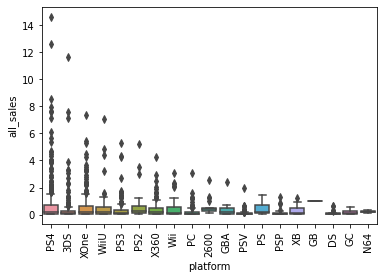

In [44]:
sns.boxplot(x="platform", y="all_sales", data=df)
plt.xticks(rotation=90)
plt

(0.0, 1.6)

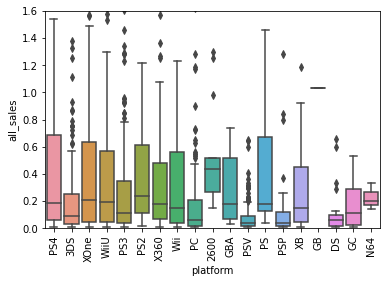

In [45]:
#немного ближе(без выбросов)
sns.boxplot(x="platform", y="all_sales", data=df)
plt.xticks(rotation=90)
plt.ylim(0,1.6)

Некоторые консоли показывают тебя хорошо и умеренно, а именно PS4, XONE, PS2, PS, 2600

### Подробнее о ПК

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [46]:
#датафрейм только с РС
pc_games = df[df['platform']=='PC']
pc_games = pc_games.dropna(subset=['critic_score','user_score'])
pc_games = pc_games.sort_values(by='critic_score', ascending=False).reset_index()
pc_games = pc_games.drop(columns=['index'])
pc_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
1,The Witcher 3: Wild Hunt,PC,2015.0,Role-Playing,0.21,0.46,0.0,0.05,93.0,9.3,M,0.72
2,Metal Gear Solid V: The Phantom Pain,PC,2015.0,Action,0.00,0.07,0.0,0.00,91.0,7.7,M,0.07
3,Overwatch,PC,2016.0,Shooter,0.25,0.24,0.0,0.04,91.0,6.8,T,0.53
4,Dark Souls II,PC,2014.0,Role-Playing,0.08,0.08,0.0,0.01,91.0,7.1,T,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...
125,Sacred 3,PC,2014.0,Role-Playing,0.00,0.02,0.0,0.00,57.0,1.4,M,0.02
126,The Technomancer,PC,2016.0,Role-Playing,0.00,0.01,0.0,0.00,56.0,6.8,M,0.01
127,Homefront: The Revolution,PC,2016.0,Shooter,0.01,0.02,0.0,0.00,54.0,3.5,M,0.03
128,Bus Simulator 16,PC,2016.0,Simulation,0.00,0.03,0.0,0.00,46.0,6.1,no_ESRB,0.03


Text(0.5, 1.0, 'зависимость оценки критиков и общ продаж')

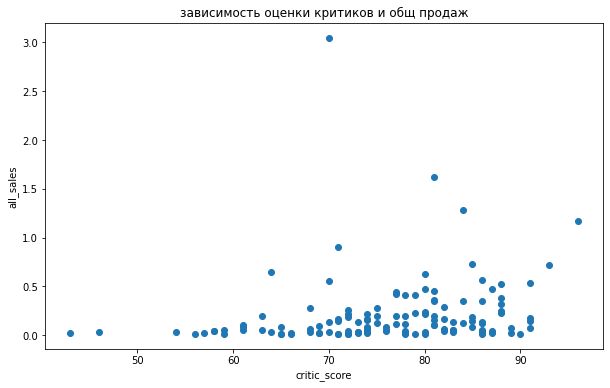

In [47]:
#зависимость оценки критиков и общ продаж
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = pc_games['critic_score'], y = pc_games['all_sales'])
plt.xlabel("critic_score")
plt.ylabel("all_sales")
plt.title('зависимость оценки критиков и общ продаж')

Text(0.5, 1.0, 'зависимость оценки пользователей и общ продаж')

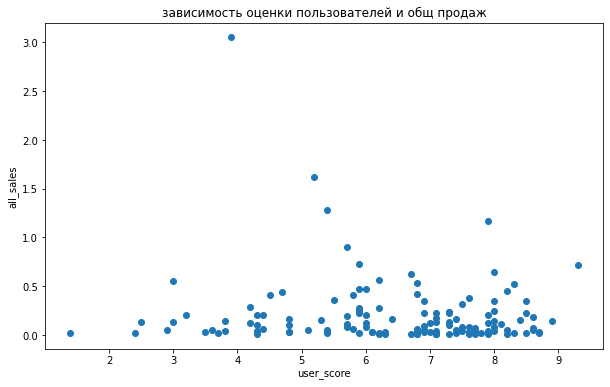

In [48]:
#зависимость оценки пользователей и общ продаж
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = pc_games['user_score'], y = pc_games['all_sales'])
plt.xlabel("user_score")
plt.ylabel("all_sales")
plt.title('зависимость оценки пользователей и общ продаж')

In [49]:
pc_games.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.000000,-0.218430,-0.259214,NaN,-0.227042,-0.038509,-0.000212,-0.249279
na_sales,-0.218430,1.000000,0.880578,NaN,0.931327,0.183277,-0.108473,0.955550
eu_sales,-0.259214,0.880578,1.000000,NaN,0.906722,0.165939,-0.091486,0.980506
jp_sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
other_sales,-0.227042,0.931327,0.906722,NaN,1.000000,0.185518,-0.089157,0.952514
critic_score,-0.038509,0.183277,0.165939,NaN,0.185518,1.000000,0.488729,0.179126
user_score,-0.000212,-0.108473,-0.091486,NaN,-0.089157,0.488729,1.000000,-0.100224
all_sales,-0.249279,0.955550,0.980506,NaN,0.952514,0.179126,-0.100224,1.000000


Отрицательное значение корреляции в оценке пользователей говорят об обратной связи

Посмотри на остальных

In [50]:
#функция для создания графиков 
#зависимость оценки критиков и общ продаж
def games(name):   
    games = df[df['platform']==name]
    games = games.dropna(subset=['critic_score'])
    games = games.sort_values(by='critic_score', ascending=False).reset_index()
    games = games.drop(columns=['index'])
    games
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x = games['critic_score'], y = games['all_sales'])
    plt.xlabel("Оценка критиков")
    plt.ylabel("Всего миллионов продаж")
    plt.title(name)
    

In [51]:
# Комментарий ревьюера 2
temp1, temp2, temp3 = df.copy(), df.copy(),df.copy()
print(len(temp1.dropna(subset=['critic_score'])))
print(len(temp2.dropna(subset=['user_score'])))
print(len(temp3.dropna(subset=['critic_score','user_score'])))

872
1015
827


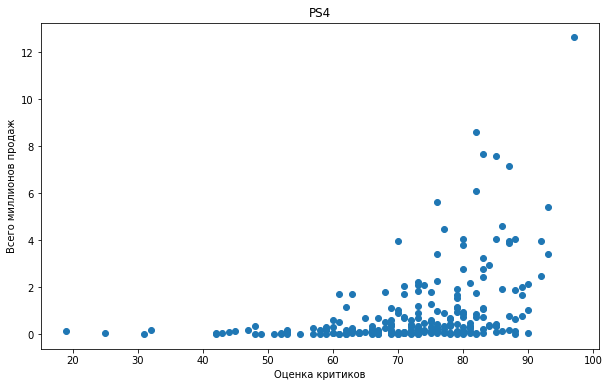

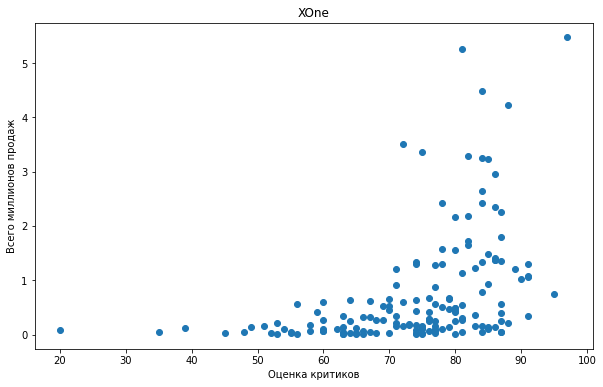

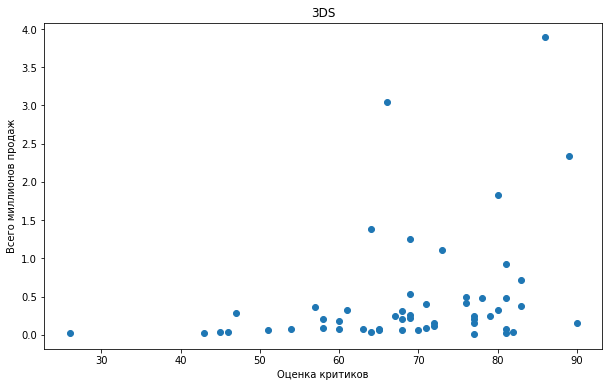

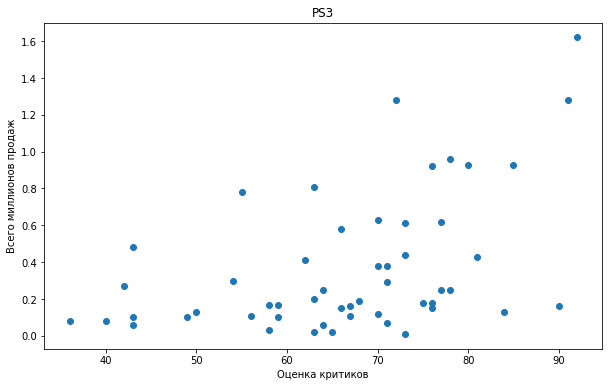

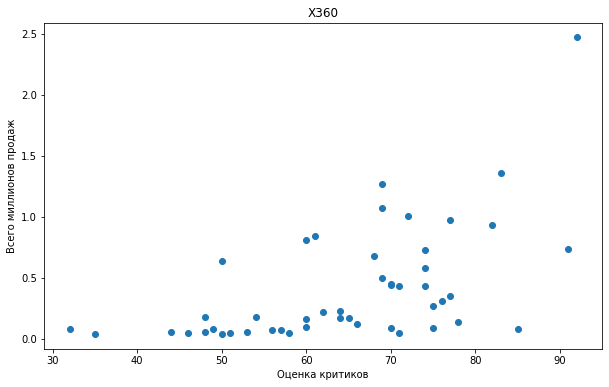

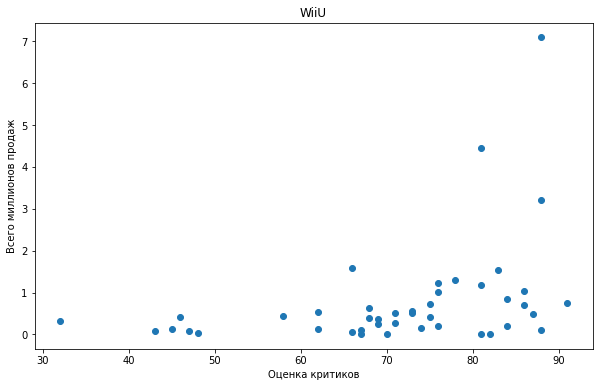

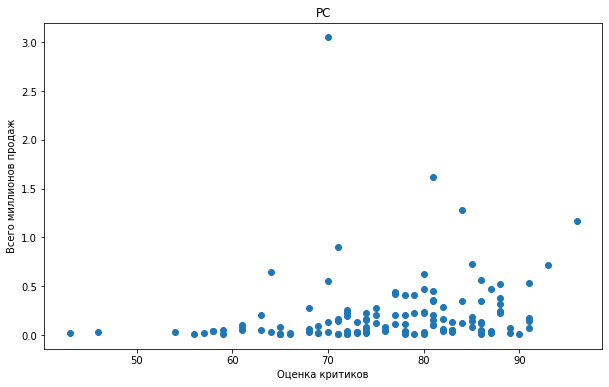

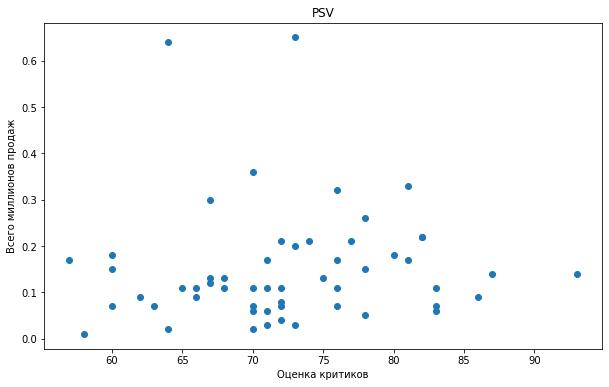

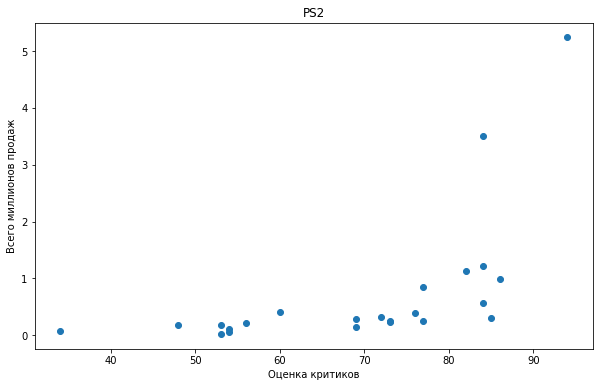

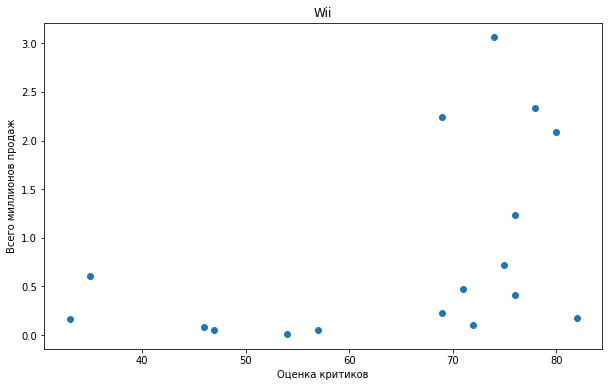

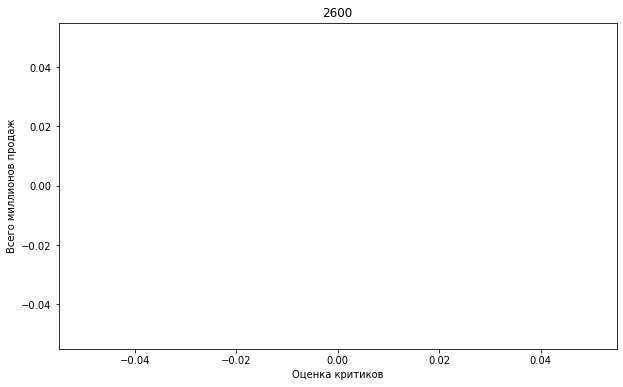

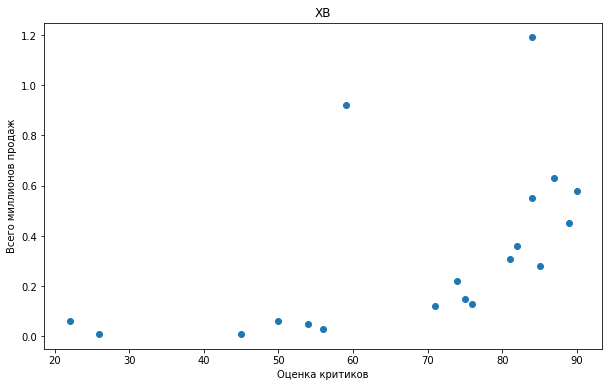

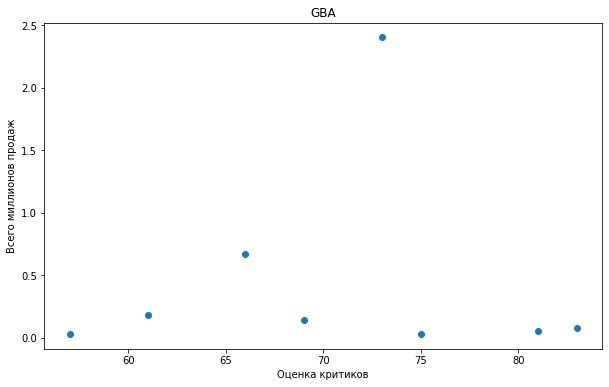

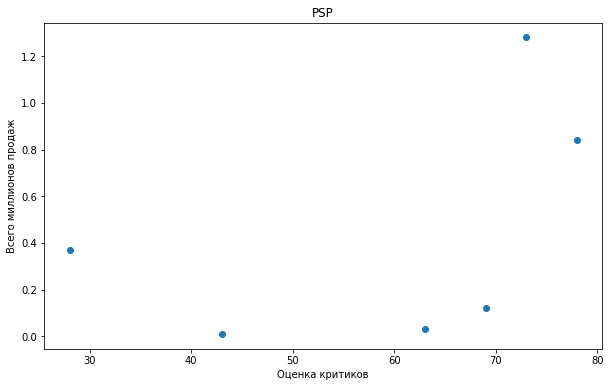

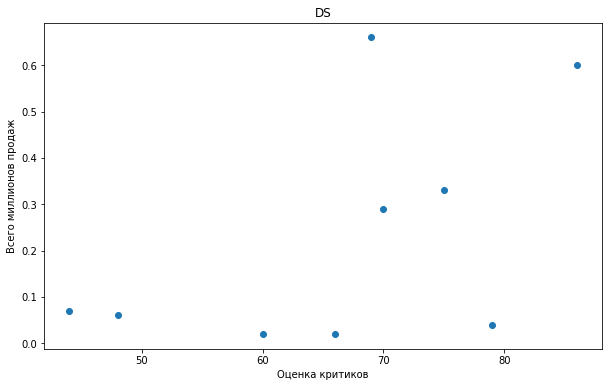

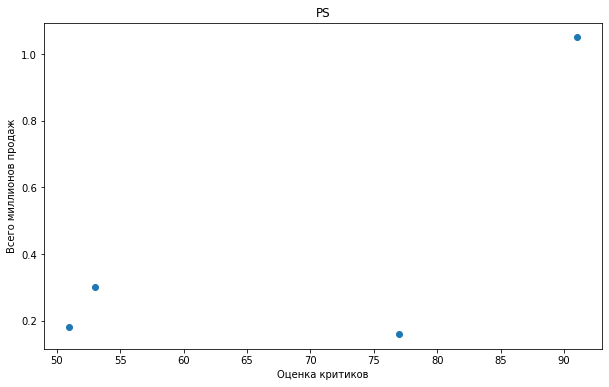

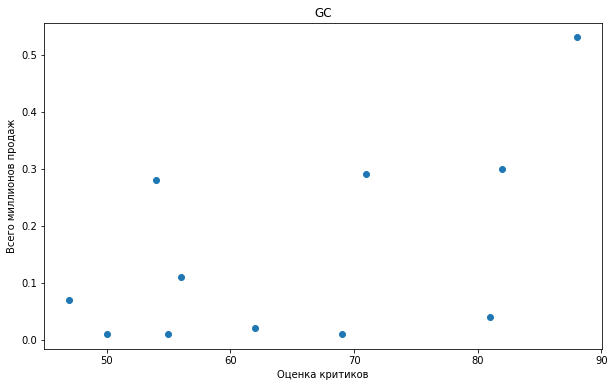

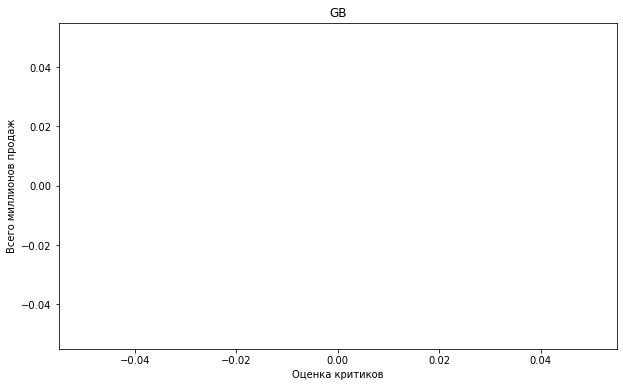

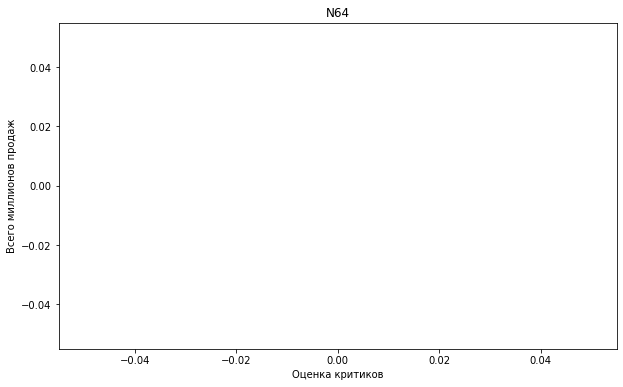

In [52]:
for elem in bsp_all['platform']:
    games(elem)

In [53]:
#функция для создания графиков 
#зависимость оценки пользователей и общ продаж
def games(name):       
    
    games = df[df['platform']==name]
    games = games.dropna(subset=['user_score'])
    games = games.sort_values(by='user_score', ascending=False).reset_index()
    games = games.drop(columns=['index'])
    games
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x = games['user_score'], y = games['all_sales'])
    plt.xlabel("Оценка пользователей")
    plt.ylabel("Всего миллионов продаж")
    plt.title(name)
    

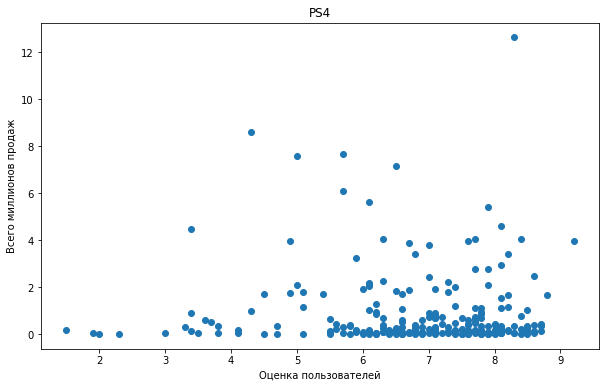

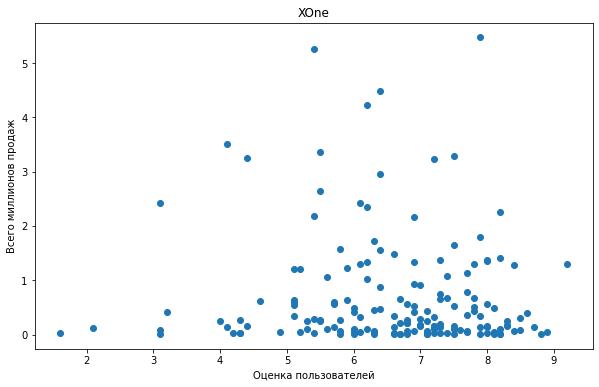

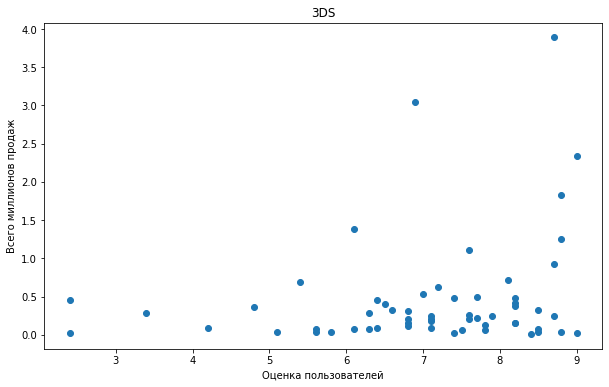

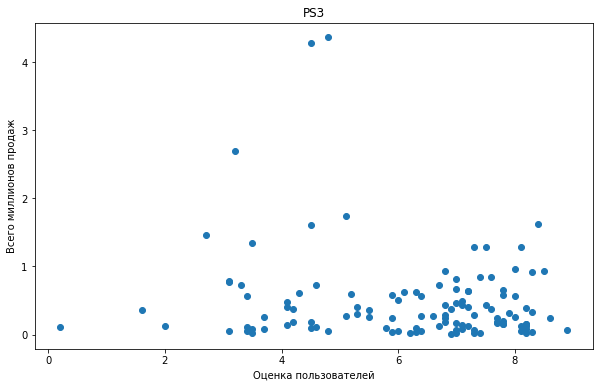

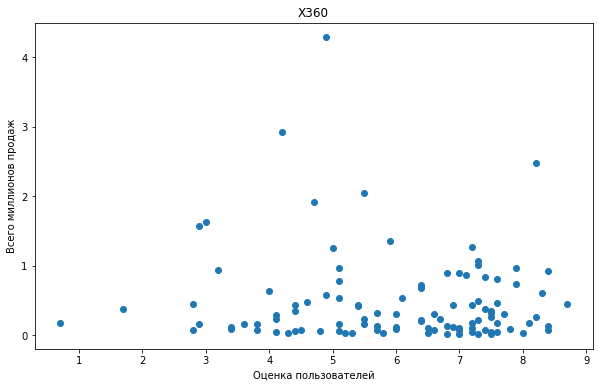

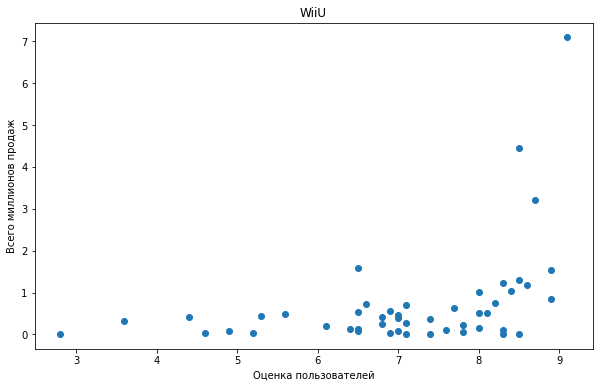

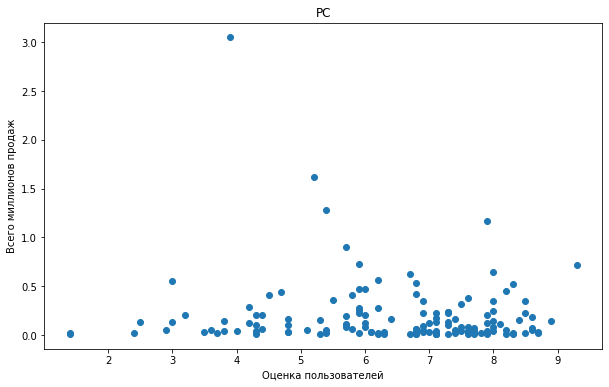

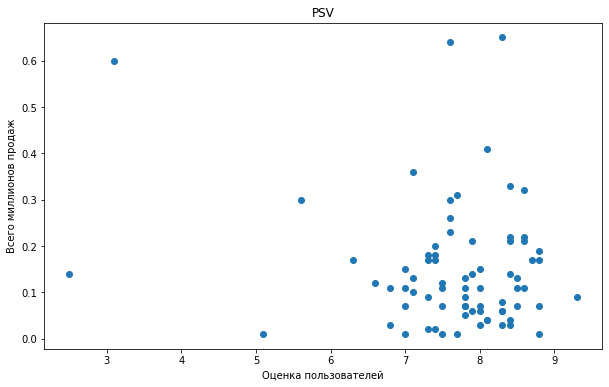

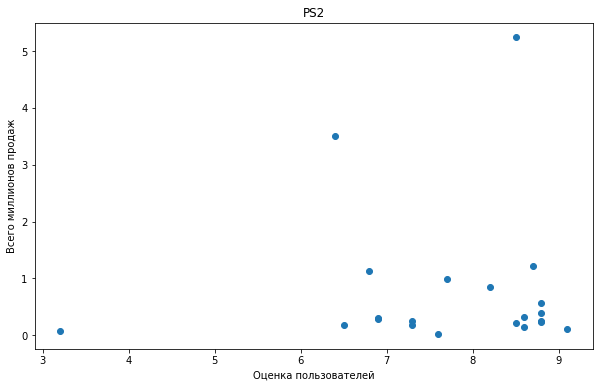

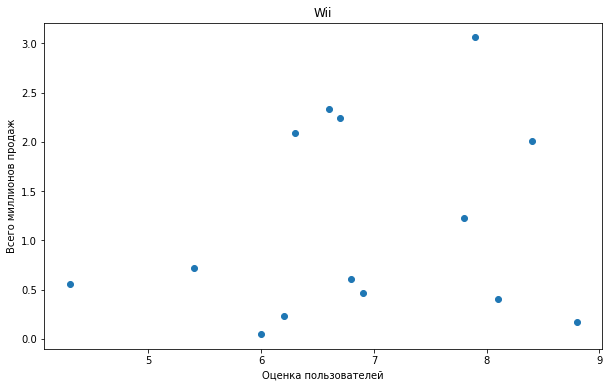

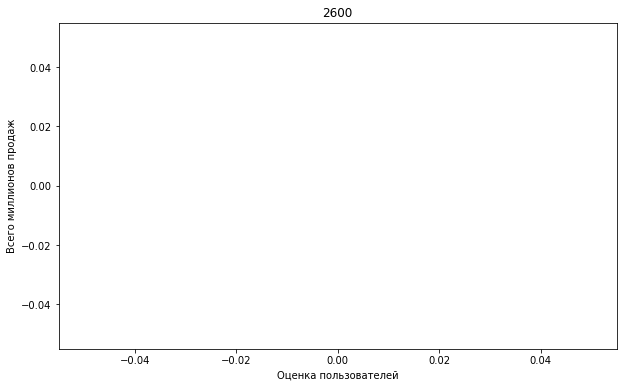

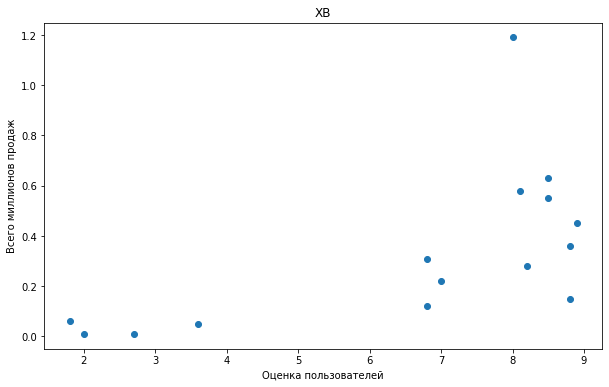

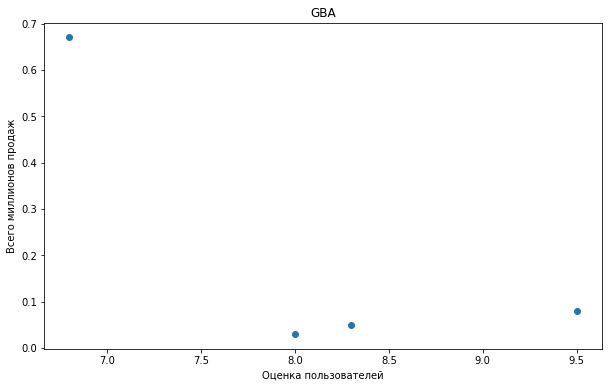

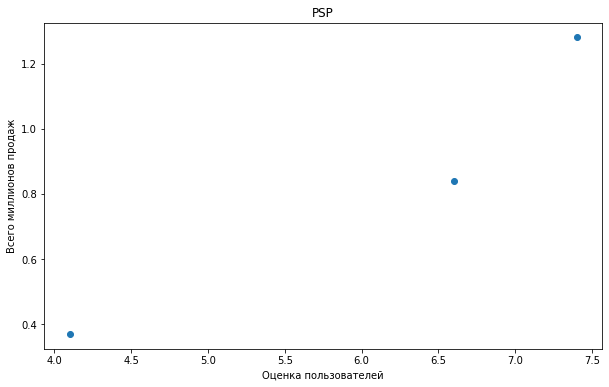

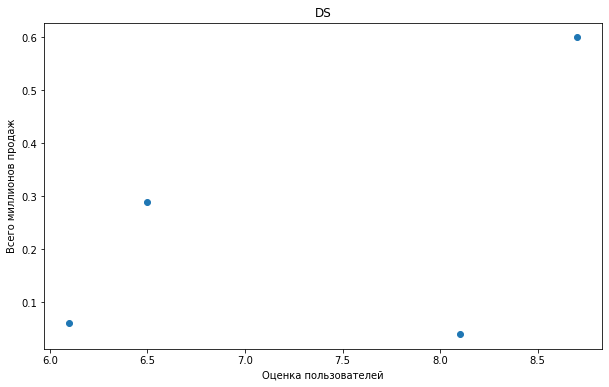

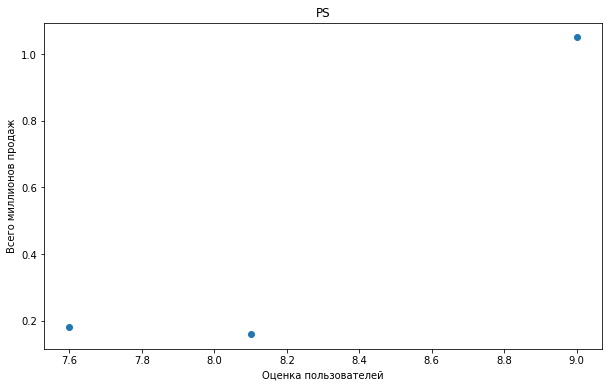

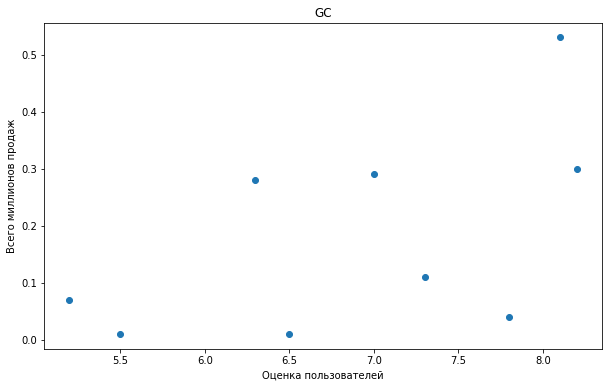

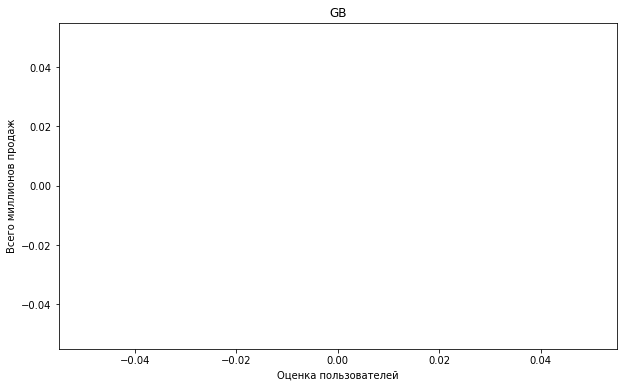

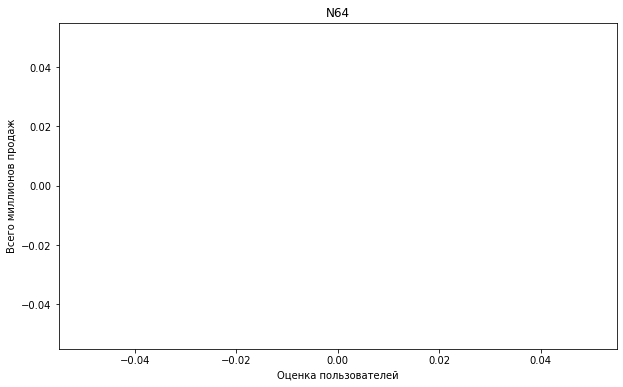

In [54]:
for elem in bsp_all['platform']:
    games(elem)

In [55]:
#создание таблиц зависимости оценок и продаж по плотформат
games = df.copy()
games['critic_score'] = games['critic_score'].dropna()
games['user_score'] = games['user_score'].dropna()
games = games.sort_values(by='critic_score', ascending=False).reset_index()
games = games.drop(columns=['index'])
games = games.drop(columns=['name','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','rating'])

for elem in bsp_all['platform']:
    print(elem)
    display(games[games['platform']==elem].corr())

PS4


,critic_score,user_score,all_sales
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
all_sales,0.402661,-0.040132,1.000000


XOne


,critic_score,user_score,all_sales
critic_score,1.000000,0.440977,0.428677
user_score,0.440977,1.000000,-0.070384
all_sales,0.428677,-0.070384,1.000000


3DS


,critic_score,user_score,all_sales
critic_score,1.000000,0.858405,0.320596
user_score,0.858405,1.000000,0.230161
all_sales,0.320596,0.230161,1.000000


PS3


,critic_score,user_score,all_sales
critic_score,1.000000,0.652605,0.474398
user_score,0.652605,1.000000,-0.142199
all_sales,0.474398,-0.142199,1.000000


X360


,critic_score,user_score,all_sales
critic_score,1.000000,0.503387,0.555234
user_score,0.503387,1.000000,-0.076748
all_sales,0.555234,-0.076748,1.000000


WiiU


,critic_score,user_score,all_sales
critic_score,1.000000,0.763536,0.370201
user_score,0.763536,1.000000,0.407926
all_sales,0.370201,0.407926,1.000000


PC


,critic_score,user_score,all_sales
critic_score,1.000000,0.488729,0.185175
user_score,0.488729,1.000000,-0.081843
all_sales,0.185175,-0.081843,1.000000


PSV


,critic_score,user_score,all_sales
critic_score,1.000000,0.514432,0.054017
user_score,0.514432,1.000000,-0.168240
all_sales,0.054017,-0.168240,1.000000


PS2


,critic_score,user_score,all_sales
critic_score,1.000000,0.446009,0.573589
user_score,0.446009,1.000000,0.034346
all_sales,0.573589,0.034346,1.000000


Wii


,critic_score,user_score,all_sales
critic_score,1.000000,0.280904,0.45418
user_score,0.280904,1.000000,0.20465
all_sales,0.454180,0.204650,1.00000


2600


,critic_score,user_score,all_sales
critic_score,NaN,NaN,NaN
user_score,NaN,NaN,NaN
all_sales,NaN,NaN,1.0


XB


,critic_score,user_score,all_sales
critic_score,1.000000,0.940453,0.539500
user_score,0.940453,1.000000,0.615199
all_sales,0.539500,0.615199,1.000000


GBA


,critic_score,user_score,all_sales
critic_score,1.000000,0.939218,0.035739
user_score,0.939218,1.000000,-0.771774
all_sales,0.035739,-0.771774,1.000000


PSP


,critic_score,user_score,all_sales
critic_score,1.000000,0.947517,0.470843
user_score,0.947517,1.000000,0.963755
all_sales,0.470843,0.963755,1.000000


DS


,critic_score,user_score,all_sales
critic_score,1.000000,0.903211,0.543838
user_score,0.903211,1.000000,0.530863
all_sales,0.543838,0.530863,1.000000


PS


,critic_score,user_score,all_sales
critic_score,1.000000,0.944414,0.734240
user_score,0.944414,1.000000,0.928741
all_sales,0.734240,0.928741,1.000000


GC


,critic_score,user_score,all_sales
critic_score,1.000000,0.872314,0.577232
user_score,0.872314,1.000000,0.559208
all_sales,0.577232,0.559208,1.000000


GB


,critic_score,user_score,all_sales
critic_score,NaN,NaN,NaN
user_score,NaN,NaN,NaN
all_sales,NaN,NaN,NaN


N64


,critic_score,user_score,all_sales
critic_score,NaN,NaN,NaN
user_score,NaN,NaN,NaN
all_sales,NaN,NaN,1.0


Некоторые выводы:

* Критики - Продажи
    * самые высокие показатели зависимости у PS, PS2 и GC
    * самые низкие GBA
* Пользователи - Продажи
    * самые высокие показатель зависимости у XB, PSP, PS
    * a GBA имеет высокую отрицательную зависимость
    
Разница показателей говорит о том, что критики хвалят игру, пользователи ее покупают, но она не оправдывает своих надеж из-за чего последние ставят не такие же высокие оценки как критики

### Наблюдение про жанры

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [56]:
#таблица жанра и суммы оценок
genres = df.copy()
genres = genres.pivot_table(index='genre',values=['na_sales','eu_sales','jp_sales','other_sales','all_sales'],aggfunc='sum')
genres = genres.sort_values('all_sales', ascending=False)
genres = genres.reset_index()
genres

,genre,all_sales,eu_sales,jp_sales,na_sales,other_sales
0,Action,227.03,82.82,30.89,88.37,24.95
1,Shooter,182.03,68.34,4.95,86.43,22.31
2,Sports,131.08,51.19,3.87,59.36,16.66
3,Role-Playing,104.92,28.64,33.18,34.24,8.86
4,Misc,49.77,15.00,6.70,22.75,5.32
5,Fighting,33.09,8.02,6.57,15.28,3.22
6,Racing,32.70,16.15,1.84,11.23,3.48
7,Adventure,21.81,6.83,3.66,9.38,1.94
8,Platform,20.31,7.76,2.81,7.85,1.89
9,Simulation,15.14,7.47,2.47,4.15,1.05


Самыми популярными являются игры жанров: Экшен, Шутер, Спорт, Ролевая игра и Misc

In [57]:
#таблица жанра и суммы оценок
genres = df.copy()
genres = genres.pivot_table(index='genre',values=['critic_score','user_score'],aggfunc='mean')
genres = genres.sort_values('critic_score', ascending=False)
genres = genres.reset_index()
genres

,genre,critic_score,user_score
0,Puzzle,77.625000,8.285714
1,Strategy,75.541667,7.245833
2,Role-Playing,74.398058,7.330631
3,Shooter,73.854545,6.541732
4,Platform,73.647059,6.751515
5,Adventure,72.657895,7.416327
6,Misc,71.212766,7.052941
7,Fighting,71.000000,7.078049
8,Sports,70.407080,5.552349
9,Racing,70.218750,6.415873


Наивысшие оценки критики ставят играм в жанре: Пазлы, Стратегии, Ролевые игры, Шутерыи и Платаформы

А пользователям больше нравятся: Пазлы, Приключения, Ролевые, Стратегии и Файтинги

Посмотрим на общие продажи, оценки критиков и оценки пользователей по каждой платформе у которой больше 50 миллионов продаж


In [58]:
bsp_all[bsp_all['all_sales']>50]

,platform,all_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,87.87
3,PS3,76.49
4,X360,58.40


In [59]:
#функция создания таблицы одной платформы по жанру
def genres_name(name):
    genres = df.copy()
    genres = genres[genres['platform']==name]
    genres_sales = genres.pivot_table(index='genre',values=['all_sales'],aggfunc='sum')
    genres_score = genres.pivot_table(index='genre',values=['critic_score','user_score'],aggfunc='mean')
    genres_score['all_sales'] = genres_sales['all_sales']
    genres_score['percent_sales'] = genres_score['all_sales']/genres_score['all_sales'].sum()
    genres_score = genres_score.sort_values('critic_score', ascending=False)
    genres_score = genres_score.fillna(0)
    critic_score = 0 
    for i in range(len(genres_score)):
        if i > 4:
            critic_score += genres_score['critic_score'][i]
    genres_score = genres_score.sort_values('user_score', ascending=False)
    user_score = 0 
    for i in range(len(genres_score)):
        if i > 4:
            user_score += genres_score['user_score'][i]
    genres_score = genres_score.sort_values('all_sales', ascending=False)
    all_sales = 0 
    for i in range(len(genres_score)):
        if i > 4:
            all_sales += genres_score['all_sales'][i]
    genres_score = genres_score.sort_values('percent_sales', ascending=False)
    percent_sales = 0 
    for i in range(len(genres_score)):
        if i > 4:
            percent_sales += genres_score['percent_sales'][i]
        
    genres_score= genres_score.reset_index()
    new_row = ({'genre' : 'other',
                'critic_score':critic_score,
                'user_score':user_score,
                'all_sales':all_sales,
                'percent_sales':percent_sales})

    genres_score = genres_score.append(new_row, ignore_index=True)   
   
    
    return genres_score

In [60]:
bsp_all[bsp_all['all_sales']>50]

,platform,all_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,87.87
3,PS3,76.49
4,X360,58.40


In [61]:
genres_PS4 = genres_name('PS4')
genres_XOne = genres_name('XOne')
genres_3DS = genres_name('3DS')
genres_PS3 = genres_name('PS3')
genres_X360 = genres_name('X360')

C:\Users\Glapa\AppData\Local\Temp\ipykernel_1144\2670714375.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genres_score = genres_score.append(new_row, ignore_index=True)
C:\Users\Glapa\AppData\Local\Temp\ipykernel_1144\2670714375.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genres_score = genres_score.append(new_row, ignore_index=True)
C:\Users\Glapa\AppData\Local\Temp\ipykernel_1144\2670714375.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genres_score = genres_score.append(new_row, ignore_index=True)
C:\Users\Glapa\AppData\Local\Temp\ipykernel_1144\2670714375.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gen

In [62]:
genres_PS4.sort_values('critic_score', ascending=False).head(6)

,genre,critic_score,user_score,all_sales,percent_sales
12,other,499.765440,46.286676,28.91,0.100330
11,Puzzle,88.000000,8.400000,0.02,0.000069
10,Strategy,77.333333,7.733333,0.40,0.001388
8,Platform,77.250000,6.387500,5.42,0.018810
1,Shooter,74.843750,6.781250,78.46,0.272289
7,Adventure,73.428571,7.740000,6.34,0.022002


In [63]:
genres_PS4.sort_values('user_score', ascending=False).head(6)

,genre,critic_score,user_score,all_sales,percent_sales
12,other,499.765440,46.286676,28.91,0.100330
11,Puzzle,88.000000,8.400000,0.02,0.000069
9,Simulation,72.500000,7.900000,1.23,0.004269
7,Adventure,73.428571,7.740000,6.34,0.022002
10,Strategy,77.333333,7.733333,0.40,0.001388
3,Role-Playing,73.375000,7.495833,28.99,0.100607


In [64]:
genres_PS4.sort_values('all_sales', ascending=False).head(6)

,genre,critic_score,user_score,all_sales,percent_sales
0,Action,71.841463,6.913953,91.62,0.317959
1,Shooter,74.843750,6.781250,78.46,0.272289
2,Sports,67.945946,5.818421,50.01,0.173555
3,Role-Playing,73.375000,7.495833,28.99,0.100607
12,other,499.765440,46.286676,28.91,0.100330
4,Racing,71.466667,6.757143,10.16,0.035259


Text(0.5, 1.0, 'Топ 5 жанров на PS4')

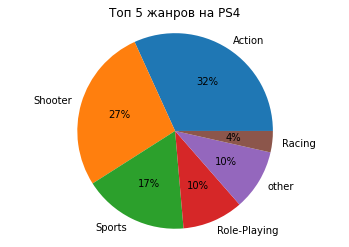

In [65]:
#круговая диаграмма процент продаж по миру

vals = genres_PS4.sort_values('all_sales', ascending=False).head(6)['percent_sales']
labels = genres_PS4.sort_values('all_sales', ascending=False).head(6)['genre']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels,normalize=False, autopct='%.0f%%')
ax.axis("equal")
plt.title('Топ 5 жанров на PS4')

In [66]:
genres_PS4

,genre,critic_score,user_score,all_sales,percent_sales
0,Action,71.841463,6.913953,91.62,0.317959
1,Shooter,74.843750,6.781250,78.46,0.272289
2,Sports,67.945946,5.818421,50.01,0.173555
3,Role-Playing,73.375000,7.495833,28.99,0.100607
4,Racing,71.466667,6.757143,10.16,0.035259
5,Misc,70.000000,6.437500,7.77,0.026965
6,Fighting,72.636364,7.190909,7.73,0.026826
7,Adventure,73.428571,7.740000,6.34,0.022002
8,Platform,77.250000,6.387500,5.42,0.018810
9,Simulation,72.500000,7.900000,1.23,0.004269


PS4 про жанры
* наивысшие оценки от критиков у: пазлы, стратегии, платформеры, шутеры, приключения 
* наивысшие оценки от пользоватлей у: пазлы, симуляторы, приключения, стратегии, ролевые игры
* наибольшие продажи: экшен, шутеры, спорт, ролевые игры, гонки

In [67]:
genres_XOne.sort_values('critic_score', ascending=False).head(6)

,genre,critic_score,user_score,all_sales,percent_sales
11,other,422.627002,37.586091,12.79,0.091123
10,Strategy,87.000000,8.100000,0.25,0.001781
3,Role-Playing,80.777778,7.522222,10.55,0.075164
6,Adventure,79.000000,7.550000,2.68,0.019094
0,Shooter,77.533333,6.637931,55.39,0.394628
8,Platform,74.000000,5.625000,0.62,0.004417


In [68]:
genres_XOne.sort_values('user_score', ascending=False).head(6)

,genre,critic_score,user_score,all_sales,percent_sales
11,other,422.627002,37.586091,12.79,0.091123
10,Strategy,87.000000,8.100000,0.25,0.001781
6,Adventure,79.000000,7.550000,2.68,0.019094
3,Role-Playing,80.777778,7.522222,10.55,0.075164
7,Fighting,73.500000,7.200000,2.17,0.015460
5,Misc,73.700000,7.060000,6.74,0.048019


In [69]:
genres_XOne.sort_values('all_sales', ascending=False).head(6)

,genre,critic_score,user_score,all_sales,percent_sales
0,Shooter,77.533333,6.637931,55.39,0.394628
1,Action,71.591837,6.703636,31.06,0.221288
2,Sports,71.142857,5.626667,23.68,0.168709
11,other,422.627002,37.586091,12.79,0.091123
3,Role-Playing,80.777778,7.522222,10.55,0.075164
4,Racing,73.692308,6.692857,6.89,0.049088


Text(0.5, 1.0, 'Топ 5 жанров на XOne')

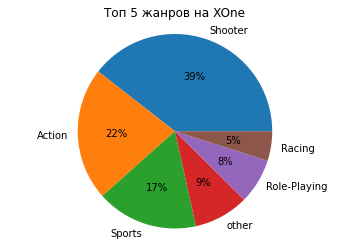

In [70]:
#круговая диаграмма процент продаж по миру

vals = genres_XOne.sort_values('all_sales', ascending=False).head(6)['percent_sales']
labels = genres_XOne.sort_values('all_sales', ascending=False).head(6)['genre']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels,normalize=False, autopct='%.0f%%')
ax.axis("equal")
plt.title('Топ 5 жанров на XOne')

XOne про жанры
* наивысшие оценки от критиков у: стратегии, ролевые игры, приключения, шутеры, платформенные
* наивысшие оценки от пользоватлей у: стратегии, приключения, ролевые, файтинги, misc
* наибольшие продажи: шутеры, экшен, спорт,  ролевые игры гонки,

In [71]:
genres_3DS.sort_values('critic_score', ascending=False).head(6)

,genre,critic_score,user_score,all_sales,percent_sales
11,other,385.200000,39.337500,8.57,0.097630
4,Platform,78.600000,7.740000,3.98,0.045341
7,Sports,78.000000,5.300000,1.34,0.015265
5,Misc,76.750000,7.800000,3.85,0.043860
6,Adventure,74.000000,7.233333,1.66,0.018911
0,Role-Playing,73.416667,7.675000,40.05,0.456254


In [72]:
genres_3DS.sort_values('user_score', ascending=False).head(6)

,genre,critic_score,user_score,all_sales,percent_sales
11,other,385.200000,39.3375,8.57,0.097630
5,Misc,76.750000,7.8000,3.85,0.043860
4,Platform,78.600000,7.7400,3.98,0.045341
9,Strategy,69.000000,7.7000,0.78,0.008886
0,Role-Playing,73.416667,7.6750,40.05,0.456254
8,Puzzle,70.000000,7.5000,0.87,0.009911


In [73]:
genres_3DS.sort_values('all_sales', ascending=False).head(6)

,genre,critic_score,user_score,all_sales,percent_sales
0,Role-Playing,73.416667,7.675000,40.05,0.456254
1,Action,61.450000,6.579167,22.46,0.255867
11,other,385.200000,39.337500,8.57,0.097630
2,Fighting,61.000000,6.600000,8.10,0.092276
3,Simulation,69.750000,7.325000,4.62,0.052632
4,Platform,78.600000,7.740000,3.98,0.045341


Text(0.5, 1.0, 'Топ 5 жанров на 3DS')

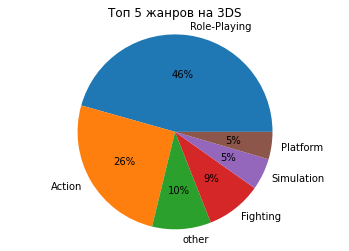

In [74]:
#круговая диаграмма процент продаж по миру

vals = genres_3DS.sort_values('all_sales', ascending=False).head(6)['percent_sales']
labels = genres_3DS.sort_values('all_sales', ascending=False).head(6)['genre']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%.0f%%')
ax.axis("equal")
plt.title('Топ 5 жанров на 3DS')

3DS про жанры
* наивысшие оценки от критиков у: платформеры, спорт, мisc, приключения, ролевые игры
* наивысшие оценки от пользоватлей у: мisc, платформеры, стратегии, ролевые игры, пазлы
* наибольшие продажи: ролевые игры, экшен, файтинги, симуляторы, платформеры

In [75]:
genres_PS3.sort_values('critic_score', ascending=False).head(6)

,genre,critic_score,user_score,all_sales,percent_sales
12,other,350.723810,41.418958,8.84,0.115571
11,Puzzle,76.000000,8.200000,0.19,0.002484
3,Misc,70.666667,6.616667,8.62,0.112694
4,Role-Playing,70.100000,6.878571,6.69,0.087462
1,Sports,67.333333,4.563636,18.10,0.236632
7,Racing,66.666667,4.914286,1.82,0.023794


In [76]:
genres_PS3.sort_values('user_score', ascending=False).head(6)

,genre,critic_score,user_score,all_sales,percent_sales
12,other,350.72381,41.418958,8.84,0.115571
9,Simulation,0.00000,8.900000,0.46,0.006014
11,Puzzle,76.00000,8.200000,0.19,0.002484
5,Fighting,65.20000,7.025000,2.89,0.037783
4,Role-Playing,70.10000,6.878571,6.69,0.087462
10,Strategy,50.00000,6.700000,0.23,0.003007


In [77]:
genres_PS3.sort_values('all_sales', ascending=False).head(6)

,genre,critic_score,user_score,all_sales,percent_sales
0,Action,65.857143,6.602941,21.82,0.285266
1,Sports,67.333333,4.563636,18.10,0.236632
2,Shooter,65.666667,6.421429,12.42,0.162374
12,other,350.723810,41.418958,8.84,0.115571
3,Misc,70.666667,6.616667,8.62,0.112694
4,Role-Playing,70.100000,6.878571,6.69,0.087462


Text(0.5, 1.0, 'Топ 5 жанров на PS3')

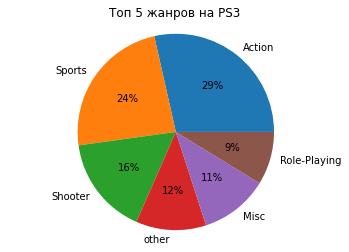

In [78]:
#круговая диаграмма процент продаж по миру

vals = genres_PS3.sort_values('all_sales', ascending=False).head(6)['percent_sales']
labels = genres_PS3.sort_values('all_sales', ascending=False).head(6)['genre']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%.0f%%')
ax.axis("equal")
plt.title('Топ 5 жанров на PS3')

PS3 про жанры
* наивысшие оценки от критиков у: пазлы, misc, ролевые игры, спорт, гонки
* наивысшие оценки от пользоватлей у: сумуляторы, пазлы, файтинги, ролевые игры,стратегии
* наибольшие продажи: экшен, спрот, шутери, misc, ролевые игры

In [79]:
genres_X360.sort_values('critic_score', ascending=False).head(6)

,genre,critic_score,user_score,all_sales,percent_sales
12,other,376.339286,38.033434,6.47,0.110788
11,Puzzle,78.000000,8.400000,0.14,0.002397
9,Strategy,77.000000,7.500000,0.35,0.005993
3,Misc,70.500000,7.000000,3.89,0.066610
4,Role-Playing,67.000000,5.980000,2.76,0.047260
8,Fighting,66.666667,6.440000,0.66,0.011301


In [80]:
genres_X360.sort_values('user_score', ascending=False).head(6)

,genre,critic_score,user_score,all_sales,percent_sales
12,other,376.339286,38.033434,6.47,0.110788
11,Puzzle,78.000000,8.400000,0.14,0.002397
9,Strategy,77.000000,7.500000,0.35,0.005993
3,Misc,70.500000,7.000000,3.89,0.066610
0,Action,63.333333,6.517241,15.27,0.261473
8,Fighting,66.666667,6.440000,0.66,0.011301


In [81]:
genres_X360.sort_values('all_sales', ascending=False).head(6)

,genre,critic_score,user_score,all_sales,percent_sales
0,Action,63.333333,6.517241,15.27,0.261473
1,Sports,61.500000,4.604545,15.05,0.257705
2,Shooter,66.125000,6.433333,14.96,0.256164
12,other,376.339286,38.033434,6.47,0.110788
3,Misc,70.500000,7.000000,3.89,0.066610
4,Role-Playing,67.000000,5.980000,2.76,0.047260


Text(0.5, 1.0, 'Топ 5 жанров на X360')

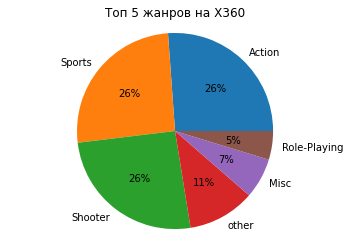

In [82]:
#круговая диаграмма процент продаж по миру

vals = genres_X360.sort_values('all_sales', ascending=False).head(6)['percent_sales']
labels = genres_X360.sort_values('all_sales', ascending=False).head(6)['genre']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%.0f%%')
ax.axis("equal")
plt.title('Топ 5 жанров на X360')

X360 про жанры
* наивысшие оценки от критиков у: пазлы, стратегии, misc, ролевые игры, файтинг
* наивысшие оценки от пользоватлей у: пазлы, стратегии, misc, экшен, файтинг
* наибольшие продажи: экшен, спрот, шутер, misc, ролевые игры

##  Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы и жанры (топ-5)

Посмотрим как влияет рейтинг ESRB на продажи

In [83]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_ESRB,14.63
1,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_ESRB,11.68
3,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_ESRB,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1954,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
1955,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
1956,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01
1957,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_ESRB,0.01


In [84]:
genres = df.copy()
genres_sales = genres.pivot_table(index='genre',values=['na_sales','eu_sales','jp_sales','other_sales'],aggfunc='sum')

genres_sales = genres_sales.fillna(0)
genres_sales['percent_na_sales'] = genres_sales['na_sales']/genres_sales['na_sales'].sum()
genres_sales['percent_eu_sales'] = genres_sales['eu_sales']/genres_sales['eu_sales'].sum()
genres_sales['percent_jp_sales'] = genres_sales['jp_sales']/genres_sales['jp_sales'].sum()
genres_sales['percent_other_sales'] = genres_sales['other_sales']/genres_sales['other_sales'].sum()

genres_sales = genres_sales.sort_values('percent_na_sales', ascending=False)
percent_na_sales = 0 
for i in range(len(genres_sales)):
    if i > 4:
        percent_na_sales += genres_sales['percent_na_sales'][i]
        
genres_sales = genres_sales.sort_values('percent_eu_sales', ascending=False)
percent_eu_sales = 0 
for i in range(len(genres_sales)):
    if i > 4:
        percent_eu_sales += genres_sales['percent_eu_sales'][i]
        
genres_sales = genres_sales.sort_values('percent_jp_sales', ascending=False)
percent_jp_sales = 0 
for i in range(len(genres_sales)):
    if i > 4:
        percent_jp_sales += genres_sales['percent_jp_sales'][i]
        
genres_sales = genres_sales.sort_values('percent_other_sales', ascending=False)
percent_other_sales = 0 
for i in range(len(genres_sales)):
    if i > 4:
        percent_other_sales += genres_sales['percent_other_sales'][i]
        


        
genres_sales = genres_sales.reset_index()
genres_sales = genres_sales.drop(columns=['eu_sales','jp_sales','na_sales','other_sales'])

new_row = ({'genre' : 'other',
            'percent_na_sales':percent_na_sales,
            'percent_eu_sales':percent_eu_sales,
            'percent_jp_sales':percent_jp_sales,
            'percent_other_sales':percent_other_sales})

genres_sales = genres_sales.append(new_row, ignore_index=True)

genres_sales

C:\Users\Glapa\AppData\Local\Temp\ipykernel_1144\3092224567.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genres_sales = genres_sales.append(new_row, ignore_index=True)


,genre,percent_na_sales,percent_eu_sales,percent_jp_sales,percent_other_sales
0,Action,0.257481,0.280613,0.309488,0.276516
1,Shooter,0.251828,0.231551,0.049594,0.247257
2,Sports,0.172955,0.173443,0.038774,0.184639
3,Role-Playing,0.099764,0.097039,0.332432,0.098194
4,Misc,0.066286,0.050823,0.067128,0.058960
5,Racing,0.032720,0.054720,0.018435,0.038568
6,Fighting,0.044521,0.027174,0.065825,0.035687
7,Adventure,0.027330,0.023142,0.036670,0.021501
8,Platform,0.022872,0.026293,0.028153,0.020946
9,Simulation,0.012092,0.025310,0.024747,0.011637


In [85]:
genres_sales.sort_values('percent_na_sales', ascending=False).head(6)

,genre,percent_na_sales,percent_eu_sales,percent_jp_sales,percent_other_sales
0,Action,0.257481,0.280613,0.309488,0.276516
1,Shooter,0.251828,0.231551,0.049594,0.247257
2,Sports,0.172955,0.173443,0.038774,0.184639
12,other,0.151686,0.162635,0.175534,0.134434
3,Role-Playing,0.099764,0.097039,0.332432,0.098194
4,Misc,0.066286,0.050823,0.067128,0.058960


Text(0.5, 1.0, 'Топ 5 жанров в других регионах')

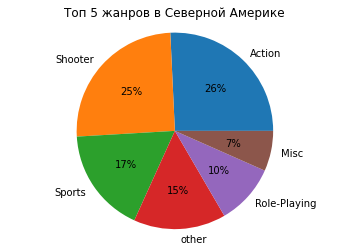

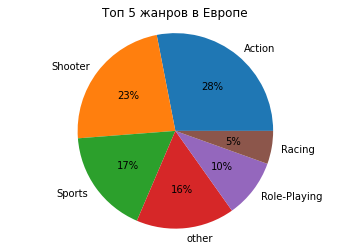

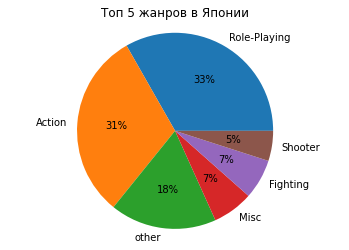

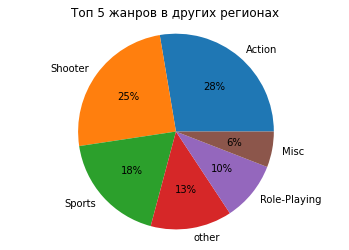

In [86]:
#круговая диаграмма жанров по регионам

vals = genres_sales.sort_values('percent_na_sales', ascending=False).head(6)['percent_na_sales']
labels = genres_sales.sort_values('percent_na_sales', ascending=False).head(6)['genre']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%.0f%%')
ax.axis("equal")
plt.title('Топ 5 жанров в Северной Америке')

vals = genres_sales.sort_values('percent_eu_sales', ascending=False).head(6)['percent_eu_sales']
labels = genres_sales.sort_values('percent_eu_sales', ascending=False).head(6)['genre']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%.0f%%',normalize=False)
ax.axis("equal")
plt.title('Топ 5 жанров в Европе')

vals = genres_sales.sort_values('percent_jp_sales', ascending=False).head(6)['percent_jp_sales']
labels = genres_sales.sort_values('percent_jp_sales', ascending=False).head(6)['genre']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%.0f%%', normalize=False)
ax.axis("equal")
plt.title('Топ 5 жанров в Японии')

vals = genres_sales.sort_values('percent_other_sales', ascending=False).head(6)['percent_other_sales']
labels = genres_sales.sort_values('percent_other_sales', ascending=False).head(6)['genre']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%.0f%%')
ax.axis("equal")
plt.title('Топ 5 жанров в других регионах')

In [87]:
platform = df.copy()
platform = platform.pivot_table(index='platform',values=['na_sales','eu_sales','jp_sales','other_sales'],aggfunc='sum')

platform['percent_na_sales'] = platform['na_sales']/platform['na_sales'].sum()
platform['percent_eu_sales'] = platform['eu_sales']/platform['eu_sales'].sum()
platform['percent_jp_sales'] = platform['jp_sales']/platform['jp_sales'].sum()
platform['percent_other_sales'] = platform['other_sales']/platform['other_sales'].sum()
platform = platform.drop(columns=['eu_sales','jp_sales','na_sales','other_sales'])

platform = platform.sort_values('percent_na_sales', ascending=False)
percent_na_sales = 0 
for i in range(len(platform)):
    if i > 4:
        percent_na_sales += platform['percent_na_sales'][i]
        
platform = platform.sort_values('percent_eu_sales', ascending=False)
percent_eu_sales = 0 
for i in range(len(platform)):
    if i > 4:
        percent_eu_sales += platform['percent_eu_sales'][i]
        
platform = platform.sort_values('percent_jp_sales', ascending=False)
percent_jp_sales = 0 
for i in range(len(platform)):
    if i > 4:
        percent_jp_sales += platform['percent_jp_sales'][i]
        
platform = platform.sort_values('percent_other_sales', ascending=False)
percent_other_sales = 0 
for i in range(len(platform)):
    if i > 4:
        percent_other_sales += platform['percent_other_sales'][i]   
        
platform = platform.reset_index()

new_row = ({'platform' : 'other',
            'percent_na_sales':percent_na_sales,
            'percent_eu_sales':percent_eu_sales,
            'percent_jp_sales':percent_jp_sales,
            'percent_other_sales':percent_other_sales})

platform = platform.append(new_row, ignore_index=True)

platform.head()

C:\Users\Glapa\AppData\Local\Temp\ipykernel_1144\350088743.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  platform = platform.append(new_row, ignore_index=True)


,platform,percent_na_sales,percent_eu_sales,percent_jp_sales,percent_other_sales
0,PS4,0.287317,0.440604,0.150486,0.492962
1,XOne,0.236794,0.156705,0.003206,0.138757
2,PS3,0.074036,0.096971,0.120228,0.115926
3,X360,0.102066,0.060751,0.002104,0.057963
4,3DS,0.068413,0.055330,0.443743,0.041782


Text(0.5, 1.0, 'Распроделение платформ в других регионах')

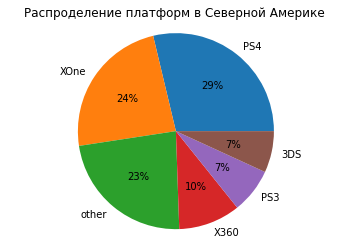

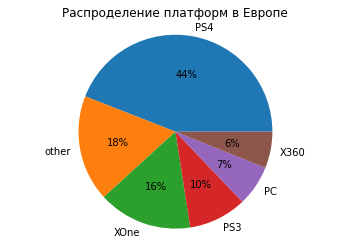

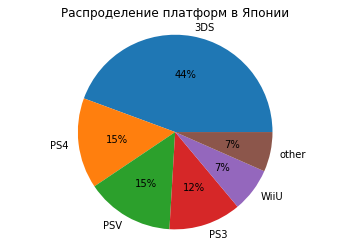

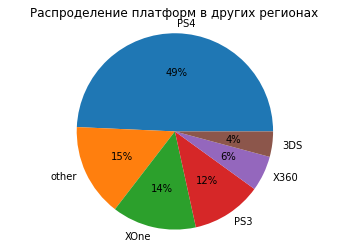

In [88]:
#круговая диаграмма платформ по регионам

vals = platform.sort_values('percent_na_sales', ascending=False).head(6)['percent_na_sales']
labels = platform.sort_values('percent_na_sales', ascending=False).head(6)['platform']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%.0f%%')
ax.axis("equal")
plt.title('Распроделение платформ в Северной Америке')

vals = platform.sort_values('percent_eu_sales', ascending=False).head(6)['percent_eu_sales']
labels = platform.sort_values('percent_eu_sales', ascending=False).head(6)['platform']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%.0f%%',normalize=False)
ax.axis("equal")
plt.title('Распроделение платформ в Европе')

vals = platform.sort_values('percent_jp_sales', ascending=False).head(6)['percent_jp_sales']
labels = platform.sort_values('percent_jp_sales', ascending=False).head(6)['platform']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%.0f%%')
ax.axis("equal")
plt.title('Распроделение платформ в Японии')

vals = platform.sort_values('percent_other_sales', ascending=False).head(6)['percent_other_sales']
labels = platform.sort_values('percent_other_sales', ascending=False).head(6)['platform']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%.0f%%')
ax.axis("equal")
plt.title('Распроделение платформ в других регионах')

Регион NA Северная Америка
* самые популярные жанры: Шутер, Экшен, Спорт, Ролевые, Misc
* популярность платформ: PS4,XOne,X360,PS3,3DS

    
Регион EU Европа
* самые популярные жанры: Экшен, Шутер, Спорт, Ролевые игры, Гонки
* популярность платформ: PS4,XOne,PS3,PC,X360
    
Регион JP Япония
* самые популярные жанры: Экшен, Шутер,  Ролевые игры, Файтинг, Misc
* популярность платформ: 3DS, PS4, PSV, PS3,WiiU

Другие регионы
* самые популярные жанры: Шутер, Экшен, Спорт, Ролевые игры, Misc
* популярность платформ: PS4,XOne,PS3,X360,3DS

In [89]:
rating = df.copy()

rating = rating.groupby(by='rating').sum()
rating = rating.sort_values('all_sales', ascending=False)
rating = rating.reset_index()

rating['rating_name'] = (['Для взрослых',
                          'Нет данных',                          
                          'Для всех',                                                    
                          'Подросткам',
                          'Для всех от 10 лет и старше',
                          'Рейтинг ожидается'
                          ]
                        )


rating=rating.drop(columns=['year_of_release','critic_score','user_score'])


rating['percent_na_sales'] = rating['na_sales']/rating['na_sales'].sum()
rating['percent_eu_sales'] = rating['eu_sales']/rating['eu_sales'].sum()
rating['percent_jp_sales'] = rating['jp_sales']/rating['jp_sales'].sum()
rating['percent_other_sales'] = rating['other_sales']/rating['other_sales'].sum()
rating['percent_all_saless'] = rating['all_sales']/rating['all_sales'].sum()


rating = rating.drop(columns=['eu_sales','jp_sales','na_sales','other_sales','all_sales'])


rating

,rating,rating_name,percent_na_sales,percent_eu_sales,percent_jp_sales,percent_other_sales,percent_all_saless
0,M,Для взрослых,0.297223,0.330047,0.086865,0.329270,0.287063
1,no_ESRB,Нет данных,0.231811,0.212103,0.622282,0.216447,0.270163
2,E,Для всех,0.202471,0.218337,0.091073,0.199712,0.194401
3,T,Подросткам,0.148888,0.133191,0.155095,0.149728,0.144135
4,E10+,Для всех от 10 лет и старше,0.119606,0.106153,0.044685,0.104843,0.104178
5,RP,Рейтинг ожидается,0.000000,0.000169,0.000000,0.000000,0.000060


Text(0.5, 1.0, 'Распроделение рейтинги в мире')

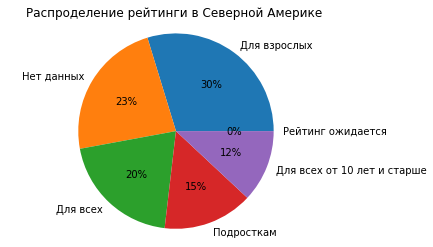

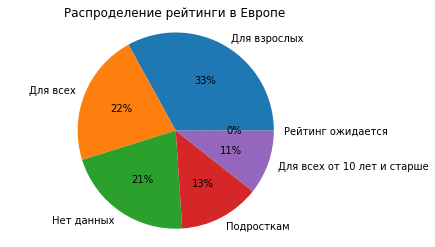

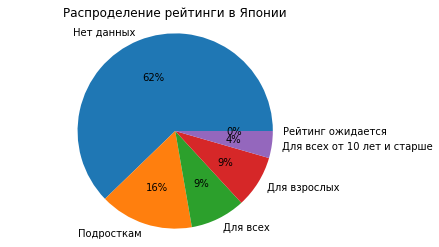

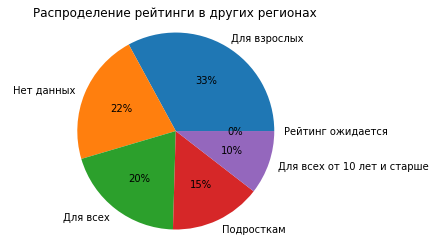

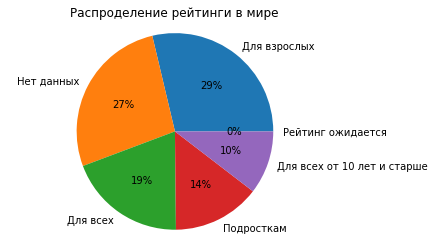

In [90]:
#круговая диаграмма возрастного рейтинга по регионам

vals = rating.sort_values('percent_na_sales', ascending=False)['percent_na_sales']
labels = rating.sort_values('percent_na_sales', ascending=False)['rating_name']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%.0f%%')
ax.axis("equal")
plt.title('Распроделение рейтинги в Северной Америке')

vals = rating.sort_values('percent_eu_sales', ascending=False)['percent_eu_sales']
labels = rating.sort_values('percent_eu_sales', ascending=False)['rating_name']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%.0f%%')
ax.axis("equal")
plt.title('Распроделение рейтинги в Европе')

vals = rating.sort_values('percent_jp_sales', ascending=False)['percent_jp_sales']
labels = rating.sort_values('percent_jp_sales', ascending=False)['rating_name']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%.0f%%')
ax.axis("equal")
plt.title('Распроделение рейтинги в Японии')

vals = rating.sort_values('percent_other_sales', ascending=False)['percent_other_sales']
labels = rating.sort_values('percent_other_sales', ascending=False)['rating_name']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%.0f%%')
ax.axis("equal")
plt.title('Распроделение рейтинги в других регионах')


vals = rating.sort_values('percent_all_saless', ascending=False)['percent_all_saless']
labels = rating.sort_values('percent_all_saless', ascending=False)['rating_name']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%.0f%%')
ax.axis("equal")
plt.title('Распроделение рейтинги в мире')

В общем и целом картина по всем регионам почти одинакова, чаще покупают игры с высоким возрастным рейтингом, рейтинг возрастного рейтинга выглядит вот так
* только для взрослых старше 17 лет (М)
* для всех от 6 лет и старше (Е)
* для лиц от 13 лет (Т)
* для всех от 10 лет и старше (Е10+)

##  Проверка гипотез

### Гипотеза 1


Нулевая гипотиза :
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотиза:
Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [91]:
#удаление пропусков в user_score
df.dropna(subset=['user_score'], inplace=True)

In [92]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
5,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
6,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
9,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
1934,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
1937,Rugby Challenge 3,XOne,2016.0,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
1940,Fast Racing Neo,WiiU,2016.0,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
1942,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.00,74.0,6.7,no_ESRB,0.01


In [93]:
results = st.ttest_ind(
    df[df['platform']=='PC']['user_score'],
    df[df['platform']=='XOne']['user_score'] 
    )
alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.18840329973299969
Не получилось отвергнуть нулевую гипотезу


На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть
нулевую гипотезу в пользу альтернативы.

Посммотрим на цифры

In [94]:
df.groupby('platform').mean().sort_values('user_score')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
platform,,,,,,,,
X360,2014.457831,0.293077,0.148365,0.001250,0.043750,65.195652,5.980769,0.486442
PSP,NaN,0.483333,0.210000,0.000000,0.136667,59.666667,6.033333,0.830000
PS3,2014.448980,0.177632,0.194912,0.049649,0.071404,66.450980,6.167544,0.493596
PC,2015.057377,0.059051,0.127810,0.000000,0.015912,76.338462,6.362774,0.202774
XB,NaN,0.243333,0.074667,0.000000,0.013333,69.933333,6.566667,0.331333
XOne,2015.133333,0.405939,0.231394,0.001636,0.062485,74.125828,6.594545,0.701455
PS4,2015.202479,0.309876,0.421612,0.035165,0.141818,72.209402,6.828099,0.908471
Wii,2014.000000,0.700000,0.350000,0.001429,0.104286,70.166667,6.871429,1.155714
GC,NaN,0.141111,0.036667,0.000000,0.004444,66.500000,6.877778,0.182222


Средние оценки пользователей для Xbox One и PC: 6.15 и 6.64 соответственно

### Гипотеза 2


Нулевая гипотиза :
Средние пользовательские рейтинги жанров Action  и Sports равны

Альтернативная гипотиза:
Средние пользовательские рейтинги жанров Action  и Sports разные

In [95]:
results = st.ttest_ind(
    df[df['genre']=='Action']['user_score'],
    df[df['genre']=='Sports']['user_score'] 
    )
alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 3.318410202419957e-14
Отвергаем нулевую гипотезу


На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть
нулевую гипотезу в пользу альтернативы.

Посммотрим на цифры

In [96]:
df.groupby('genre').mean().sort_values('user_score')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
genre,,,,,,,,
Sports,2014.937008,0.383356,0.328591,0.012013,0.107651,71.228571,5.552349,0.831611
Racing,2014.882353,0.146667,0.210952,0.024127,0.045397,71.561404,6.415873,0.427143
Shooter,2014.925926,0.505118,0.410315,0.033307,0.131496,74.333333,6.541732,1.080236
Simulation,2015.208333,0.083793,0.197241,0.063793,0.024483,69.875000,6.641379,0.369310
Platform,2015.034483,0.186970,0.192121,0.077273,0.046364,75.066667,6.751515,0.502727
Action,2014.936027,0.209819,0.205801,0.028520,0.061601,69.865385,6.768580,0.505740
Misc,2014.731707,0.268431,0.129412,0.027255,0.052745,73.500000,7.052941,0.477843
Fighting,2014.891892,0.162927,0.101220,0.049512,0.042683,71.000000,7.078049,0.356341
Strategy,2015.333333,0.066667,0.080417,0.002500,0.013333,75.541667,7.245833,0.162917


Средние оценки пользователей для Action и Sports: 6.47 и 5.36 соответственно

## Общий вывод

Регион NA Северная Америка
* самые популярные жанры: Шутер, Экшен, Спорт, Ролевые, Misc
* популярность платформ: PS4,XOne,X360,PS3,3DS

    
Регион EU Европа
* самые популярные жанры: Экшен, Шутер, Спорт, Ролевые игры, Гонки
* популярность платформ: PS4,XOne,PS3,PC,X360
    
Регион JP Япония
* самые популярные жанры: Экшен, Шутер,  Ролевые игры, Файтинг, Misc
* популярность платформ: 3DS, PS4, PSV, PS3,WiiU

Другие регионы
* самые популярные жанры: Шутер, Экшен, Спорт, Ролевые игры, Misc
* популярность платформ: PS4,XOne,PS3,X360,3DS

Рейтинг возрастного рейтинга выглядит вот так
* только для взрослых старше 17 лет (М)
* для всех от 6 лет и старше (Е)
* для лиц от 13 лет (Т)
* для всех от 10 лет и старше (Е10+)


Судя по всему иргы с жанрами Экшен, Шутер, Ролевые, Спорт, Симуляторы, для платформ PS4,XOne,Wiiu,PC с рейтингами M,E,T,E10+  будут самыми продаваемыми

Хочется заменить что PC  по сравнению с другими платформати живет и развивается уже более 35 лет, в то время как средняя продолжительность консолей, портативных или нет, от 6 до 10 лет